# Comparison of boosting algorithms in a complex multiclass problem - Spotify Song Popularity in multiple classes 
### CUNEF - MS Data Science for Finance
### Machine Learning

__Start Date:__ 17 January 2019

__End Date:__ 31 January 2019

__Authors:__ Jordi Tarroch and José María Álvarez

<img src="../images/open-graph-default.png" style="width: 600px">

# TABLE OF CONTENTS
<a id= "init"></a>


- [Executive Smmary](#executivesummary)
    - [Objectives](#objectives)
    - [KPI](#kpi)
    - [Results](#results)
- [Libraries](#libraries)
- [Data Set](#dataset)
    - [Spotify API](#spotifyapi)
    - [Data Set Test from Playlist](#datasetplaylist)
    - [Data Set Train from Year Random Sample](#datasetyearrandomsample)
    - [Data Set Test from Year Random Sample](#datasettestyearrandomsample)
    - [Target Variable](#targetvariable)
    
    - [Data Wrangling](#datawrangling)
        - [Data Wrangling 1](#datawrangling1)
        - [Data Wrangling 2](#datawrangling2)
        - [Data Wrangling 3](#datawrangling3)
            - [Scaling](#scaling)
           
                             
- [Lasso](#lasso)
    - [Final Variables](#finalvars)
    
- [Data Dictionary](#datadictionary)
    - [Predictive Variables](#predictivevariables)
    - [Target Variable](#targetvariables)

- [Exploratory Data Analysis](#eda)
    - [Categorical variables for the models](#categorical)
    - [Numeric variables for the models](#numeric)
        - [Correlation Matrix](#correlationmatrix)
    
- [Modeling](#modeling)
    - [Train and Test Data Sets](#traintest)
    
    - [Logistic Regression](#logisticregression)
        - [Feature Importance](#featureimportancerandomlogistic)
        
    - [Support Vector machine](#svm)
        - [Kernel](#kernel)
            - [Linear Kernel](#linearkernel)
                - [Feature Importance](#featureimportancerandomSVM)
            - [Polynomial Kernel](#polykernel)
            - [Radial Basis Function Kernel](#rbfkernel)
            - [Sigmoid Kernel](#sigmoidkernel)
        
    - [Random Forest](#randomforest)
        - [Feature Importance](#featureimportancerandomforest)
        
    - [XGBoost](#xgboost)
        - [Feature Importance](#featureimportancexgboost)
    - [CatBoost](#catboost)
        - [Feature Importance](#featureimportancecatboost)
    - [NGBoost](#ngboost)
        - [Feature Importance](#featureimportancengboost)
        
- [Conclusions](#conclusions)

- [References](#references)




# Executive Summary
<a id= "executivesummary"></a>


[Go to Table of Contents](#init)

Studying spotify track data we are looking for the main features and extract the most valuable information of it, in order to understand which features make a song popular. We'll do that by:

+ Firstly preprocessing the data.
+ Fitting some models with this data.
+ Selecting the best model for our study case.

### Objectives:
<a id= "objectives"></a>

The main objective of this project is to find the best model to classify a song by popularity (in ten popularity levels) given the characteristics of the song in order to understand what make a song popular and predict how popular a song can be. To do this, a supervised classification model will be estimated using the data from Lending Club Loan Data. The type of models to be compared are Logistic Regression, Support Vector Machine, Random Forest and XGBOOST. Additionaly, two new models will be tested: __NGBoost and CatBoost__.

### Question:
<a id= "question"></a>

+ Is there a model that predicts multiclass popularity levels better than the rest? 
+ If so, which features are the most important for a song's popularity?


### KPI:
<a id= "kpi"></a>

The best model will be the one that outperforms the rest in the following scores:

__- Accuracy:__ 
$$
\text { Accuracy }=\frac{t p + t n}{t p+f p+t n+f n }
$$

__- Precision:__ also called positive predictive value, is the fraction of relevant instances among the retrieved instances.
$$
\text { Precision }=\frac{t p}{t p+f p}
$$
__- Recall:__ also known as sensitivity, is the fraction of the total amount of relevant instances that were actually retrieved. 
$$
\text { Recall }=\frac{t p}{t p+f n}
$$


__- F1-score:__ In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

$$
F_{1}=\left(\frac{2}{\mathrm{recall}^{-1}+\text { precision }^{-1}}\right)=2 \cdot \frac{\text { p } \cdot \text { r }}{\text { p }+\text { r }}
$$


### Results

Based on the proposed scores, the best model to predict the test set was the __CatBoost Model__; NGBoost had the best precision, but in accuracy, recall and f1-score, the best model is CatBoost. Because the classification is not dichotomous but multiclass, there is no graphical representation of the ROC curve due to dimensionality; In addition, it is not so easy to relate prediction metrics (for example, accuracy) to an established benchmark, the best benchmark for comparison is that it has 100% successes in some class and zero in the others (which on average equals a distribution uniform data by class) which in this case corresponds to 10% (due to the ten classes) [16.6% for 6 classes]

|                     | Accuracy | precision | recall | f1-score |
|---------------------|----------|-----------|--------|----------|
| Logistic Regression | 0.36     | 0.31      | 0.36   | 0.27     |
| SVM                 | 0.35     | 0.22      | 0.35   | 0.25     |
| SVM Polynomial      | 0.37     | 0.42      | 0.37   | 0.29     |
| SVM RBF             | 0.37     | 0.41      | 0.37   | 0.29     |
| SVM Sigmoid         | 0.26     | 0.27      | 0.26   | 0.26     |
| Random Forest       | 0.35     | 0.34      | 0.35   | 0.3      |
| XGBoost             | 0.37     | 0.41      | 0.37   | 0.29     |
| CatBoost            | __0.38__     | 0.4       | __0.38__   | __0.31__     |
| NGBoost             | 0.37     | __0.43__     | 0.37   | 0.28     |

Looking at the feature importance for the models, every model had different features as the main characteristics to decide the classification, but some interesting conclusions arose from this initial approach.

| Feature Importance | Logistic Regression | SVM              | Random Forest    | XGBoost          | CatBoost         | NGBoost          |
|--------------------|---------------------|------------------|------------------|------------------|------------------|------------------|
| 1                  | danceability        | loudness         | duration_ms      | duration_ms      | duration_ms      | duration_ms      |
| 2                  | instrumentalness    | valence          | loudness         | loudness         | danceability     | loudness         |
| 3                  | explicit            | time_signature   | danceability     | danceability     | loudness         | danceability     |
| 4                  | energy              | explicit         | valence          | valence          | energy           | valence          |
| 5                  | valence             | acousticness     | acousticness     | acousticness     | speechiness      | acousticness     |
| 6                  | mode                | duration_ms      | speechiness      | speechiness      | valence          | speechiness      |
| 7                  | liveness            | key              | tempo            | tempo            | liveness         | tempo            |
| 8                  | acousticness        | instrumentalness | energy           | energy           | acousticness     | energy           |
| 9                  | speechiness         | danceability     | liveness         | liveness         | instrumentalness | liveness         |
| 10                 | duration_ms         | mode             | instrumentalness | instrumentalness | tempo            | instrumentalness |
| 11                 | time_signature      | tempo            | key              | key              | key              | key              |
| 12                 | tempo               | speechiness      | mode             | mode             | explicit         | mode             |
| 13                 | loudness            | energy           | time_signature   | time_signature   | mode             | time_signature   |
| 14                 | key                 | liveness         | explicit         | explicit         | time_signature   | explicit         |


XGBOOST and Random Forest models selected a group of features as the most important; `duration_ms`, `loudness`, `danceability`, `valence`, `acousticness`, among other. Every feature for these models is related somehow to the rest of the features; happening in both models. On the other hand, the SVM Linear Kernel and the Logistic Regression (both linear) selected a group of features as the most important as well; `explicit` is the main feature diference between the two groups of models. The only variable shared by the groups is `danceability`. Apparently, there are two approaches for this classification problem: a linear approach and a non-linear; only by looking at the features each model selects.


Therefore, following what the best model says, if you want a song to reach the maximum level of popularity you must take into account the duration of the song; how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity; the energy it produces, how fast, loud and noisy it is; and level of decibels.

[Go to Table of Contents](#init)

# LIBRARIES
<a id= "libraries"></a>

In [1]:
#spotify api
import spotipy
#dataframes
import pandas as pd

#scaling
from sklearn.preprocessing import MinMaxScaler

from spotipy.oauth2 import SpotifyClientCredentials

#Measure time
import time

#lasso
from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

#maths
import numpy as np

#visualization
import seaborn as sns
import graphviz
import panel
from matplotlib import pyplot as plt

#seed
import random

#Grid search
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 

# logisticRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

#svm
from sklearn import svm
from sklearn import datasets, metrics, model_selection, svm

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call

# Display in jupyter notebookfrom IPython.display import ImageImage(filename = 'tree.png')
import os
import six
from sklearn import tree


#xgboost
import xgboost as xgb
from xgboost import XGBClassifier

# catboost and ngboost
import catboost
import ngboost
from catboost import Pool, CatBoostClassifier

#performance metrics
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, precision_score, recall_score, accuracy_score
# confusion matrix
from sklearn import metrics

[Go to Table of Contents](#init)

# Data Set
<a id= "dataset"></a>

## Spotify API
<a id= "spotifyapi"></a>
Based on simple REST principles, the Spotify Web API endpoints return JSON metadata about music artists, albums, and tracks, directly from the Spotify Data Catalogue. Web API also provides access to user related data, like playlists and music that the user saves in the Your Music library. Such access is enabled through selective authorization, by the user. __The data obtain through this API is limited and the databases may only vary in number and year when data is not from a users playlist.__

#### Spotipy
Spotipy is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform. Spotipy supports all of the features of the Spotify Web API including access to all end points, and support for user authorization.

spotipy supports two authorization flows:

+ The Authorization Code flow This method is suitable for long-running applications which the user logs into once. It provides an access token that can be refreshed.
+ The Client Credentials flow The method makes it possible to authenticate your requests to the Spotify Web API and to obtain a higher rate limit than you would with the Authorization Code flow.

In [2]:
# CONNECT TO SPOTIFY


cid ="b43c7befbf6a4de29308d2dd70056f20" #get these from spotify for developers website
secret = "518b76d242ba4a07b37b735ec6ab1393"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

[Go to Table of Contents](#init)

## Data Set from Playlist
<a id= "datasetplaylist"></a>

In [3]:
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [4]:
#GET SONG METRICS FROM PLAYLIST

userid = 'gjordj'
playlistURI = "1z6vJLmcITe0emKZQecTJC"
#connect to playlist
# playlist = sp.user_playlist(userid, playlistURI)
playlist = get_playlist_tracks(userid, playlistURI) 

In [5]:
feature_list = []
reduce_sample = 2
#obtain data
for i in range(round(len(playlist)/reduce_sample)): 
    feature_list.append(sp.audio_features(playlist[i]['track']['id'])[0])

retrying ...1secs
retrying ...1secs


In [6]:
dfmet = pd.DataFrame(feature_list)
dfmet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 18 columns):
acousticness        1171 non-null float64
analysis_url        1171 non-null object
danceability        1171 non-null float64
duration_ms         1171 non-null int64
energy              1171 non-null float64
id                  1171 non-null object
instrumentalness    1171 non-null float64
key                 1171 non-null int64
liveness            1171 non-null float64
loudness            1171 non-null float64
mode                1171 non-null int64
speechiness         1171 non-null float64
tempo               1171 non-null float64
time_signature      1171 non-null int64
track_href          1171 non-null object
type                1171 non-null object
uri                 1171 non-null object
valence             1171 non-null float64
dtypes: float64(9), int64(4), object(5)
memory usage: 164.8+ KB


In [7]:
#SONG METRICS DATA CLEANUP
columns_to_drop_met = ['analysis_url','track_href','type','uri']
dfmet.drop(columns_to_drop_met, axis=1,inplace=True)

dfmet.rename(columns={'id': 'track_id'}, inplace=True)

dfmet.shape
dfmet.info()
dfmet.head()

#Song metrics collection is done here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 14 columns):
acousticness        1171 non-null float64
danceability        1171 non-null float64
duration_ms         1171 non-null int64
energy              1171 non-null float64
track_id            1171 non-null object
instrumentalness    1171 non-null float64
key                 1171 non-null int64
liveness            1171 non-null float64
loudness            1171 non-null float64
mode                1171 non-null int64
speechiness         1171 non-null float64
tempo               1171 non-null float64
time_signature      1171 non-null int64
valence             1171 non-null float64
dtypes: float64(9), int64(4), object(1)
memory usage: 128.2+ KB


acousticness  danceability  duration_ms  energy                track_id  \
0        0.0180         0.584       228173   0.752  0zCfmceT1YvtZXGbR6Roht   
1        0.0834         0.543       192093   0.848  3gGHAScxUDsJqcAM6ZvjuH   
2        0.0340         0.818       225983   0.803  6b8Be6ljOzmkOmFslEb23P   
3        0.0736         0.608       185352   0.798  6DNtNfH8hXkqOX1sjqmI7p   
4        0.1010         0.707       254739   0.594  1dzk5fQIYJ3MMmgoRVw2qw   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.000004    8     0.647    -6.689     1       0.0580  125.797   
1          0.000000   10     0.799    -6.058     0       0.0531  102.009   
2          0.000000    1     0.153    -4.282     1       0.0797  106.970   
3          0.000000    6     0.156    -5.092     0       0.0432   92.943   
4          0.002140    5     0.122    -7.461     1       0.0470   88.000   

   time_signature  valence  
0               4    0.791  
1               4    0.290  
2               4    0.632  
3               4    0.501  
4               4    0.193

In [8]:
#GET SONG NAME FROM PLAYLIST


# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []
explicit = []

#Get playlist
track_results = get_playlist_tracks(userid, playlistURI)
# track_results = sp.user_playlist(userid, playlistURI)["tracks"]["items"] #edit this to put in your spotify playlist URI code

track_results

[{'added_at': '2017-12-05T13:44:23Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/gjordj'},
   'href': 'https://api.spotify.com/v1/users/gjordj',
   'id': 'gjordj',
   'type': 'user',
   'uri': 'spotify:user:gjordj'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'compilation',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'},
      'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of',
      'id': '0LyfQWJT6nXafLPZqxe9Of',
      'name': 'Various Artists',
      'type': 'artist',
      'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}],
    'available_markets': [],
    'external_urls': {'spotify': 'https://open.spotify.com/album/5p0H50uFCdWTpLY640HoPc'},
    'href': 'https://api.spotify.com/v1/albums/5p0H50uFCdWTpLY640HoPc',
    'id': '5p0H50uFCdWTpLY640HoPc',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b2732a307d6420

In [9]:
for t in track_results:
    artist_name.append(t['track']['artists'][0]['name'])
    track_name.append(t['track']['name'])
    track_id.append(t['track']['id'])
    popularity.append(t['track']['popularity'])
    explicit.append(t['track']['explicit'])
    
print('number of elements in the track_id list:', len(track_id))

number of elements in the track_id list: 2342


In [10]:
dftracks = pd.DataFrame({'artist_name':artist_name,
                         'track_name':track_name,
                         'track_id':track_id,
                         'popularity':popularity,
                         'explicit':explicit})

In [11]:
#print(df_tracks.shape)
dftracks.shape
dftracks.info()
dftracks.head()#print(df_tracks.shape)

dftracks.shape
dftracks.info()
dftracks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 5 columns):
artist_name    2342 non-null object
track_name     2342 non-null object
track_id       2342 non-null object
popularity     2342 non-null int64
explicit       2342 non-null bool
dtypes: bool(1), int64(1), object(3)
memory usage: 75.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 5 columns):
artist_name    2342 non-null object
track_name     2342 non-null object
track_id       2342 non-null object
popularity     2342 non-null int64
explicit       2342 non-null bool
dtypes: bool(1), int64(1), object(3)
memory usage: 75.6+ KB


artist_name                                         track_name  \
0  La La Land Cast  Another Day Of Sun - From "La La Land" Soundtrack   
1      John Legend                                       Start A Fire   
2       Bruno Mars                                          24K Magic   
3      Major Lazer              Cold Water (feat. Justin Bieber & MØ)   
4     Fort Frances                                         Summertime   

                 track_id  popularity  explicit  
0  0zCfmceT1YvtZXGbR6Roht           8     False  
1  3gGHAScxUDsJqcAM6ZvjuH           5     False  
2  6b8Be6ljOzmkOmFslEb23P          77     False  
3  6DNtNfH8hXkqOX1sjqmI7p          19     False  
4  1dzk5fQIYJ3MMmgoRVw2qw          41     False

In [12]:
#SONG NAME DATA CLEANUP

grouped = dftracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()

dftracks.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

# doing the same grouping as before to verify the solution
grouped_after_dropping = dftracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped_after_dropping[grouped_after_dropping > 1].count()

dftracks[dftracks.duplicated(subset=['artist_name','track_name'],keep=False)].count()
dftracks.shape

# MERGE BOTH DATAFRAMES

# the 'inner' method will make sure to keep track IDs present in both datasets
dftotal = pd.merge(dftracks,dfmet,on='track_id',how='inner')
dftotal.head()
dftotal.info()


dftotal[dftotal.duplicated(subset=['artist_name','track_name'],keep=False)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 1161
Data columns (total 18 columns):
artist_name         1162 non-null object
track_name          1162 non-null object
track_id            1162 non-null object
popularity          1162 non-null int64
explicit            1162 non-null bool
acousticness        1162 non-null float64
danceability        1162 non-null float64
duration_ms         1162 non-null int64
energy              1162 non-null float64
instrumentalness    1162 non-null float64
key                 1162 non-null int64
liveness            1162 non-null float64
loudness            1162 non-null float64
mode                1162 non-null int64
speechiness         1162 non-null float64
tempo               1162 non-null float64
time_signature      1162 non-null int64
valence             1162 non-null float64
dtypes: bool(1), float64(9), int64(5), object(3)
memory usage: 164.5+ KB


artist_name                                  track_name  \
663                  2Pac                                 Do For Love   
664                  2Pac                                 Do For Love   
897      Enrique Iglesias                                        Loco   
898      Enrique Iglesias                                        Loco   
906     Pharrell Williams              Happy - From "Despicable Me 2"   
907     Pharrell Williams              Happy - From "Despicable Me 2"   
911         Faul & Wad Ad                                     Changes   
912         Faul & Wad Ad                                     Changes   
946          Elmore James                               Dust My Broom   
947          Elmore James                               Dust My Broom   
950   Cannonball Adderley                         Mercy, Mercy, Mercy   
951   Cannonball Adderley                         Mercy, Mercy, Mercy   
952              Ian Dury               Hit Me With Your Rhythm Stick   
953              Ian Dury               Hit Me With Your Rhythm Stick   
954           Clyde McCoy                                Tear It Down   
955           Clyde McCoy                                Tear It Down   
957      Plastic Bertrand                           Ca plane pour moi   
958      Plastic Bertrand                           Ca plane pour moi   
960        Charles Mingus              Wednesday Night Prayer Meeting   
961        Charles Mingus              Wednesday Night Prayer Meeting   
1038         Sandy Marton                           People from Ibiza   
1039         Sandy Marton                           People from Ibiza   
1048         José de Rico  Soltera (feat. Danny Romero & Fito Blanko)   
1049         José de Rico  Soltera (feat. Danny Romero & Fito Blanko)   
1052         The Whispers                        And The Beat Goes On   
1053         The Whispers                        And The Beat Goes On   
1061           The Angels                         My Boyfriend's Back   
1062           The Angels                         My Boyfriend's Back   

                    track_id  popularity  explicit  acousticness  \
663   3dSGqXMll4UJUohLANG0ce           6      True       0.05160   
664   3dSGqXMll4UJUohLANG0ce           6      True       0.05160   
897   0Hv8aeWmZt5vPngIql4UDF           1     False       0.37900   
898   0Hv8aeWmZt5vPngIql4UDF           1     False       0.37900   
906   3RkvscbM4aNbELiQf7PJwn          13     False       0.29100   
907   3RkvscbM4aNbELiQf7PJwn          13     False       0.29100   
911   13qqdlSeF8FcxsRyapDMZ0          35     False       0.00864   
912   13qqdlSeF8FcxsRyapDMZ0          35     False       0.00864   
946   3LGB6BkiSmzP8IHo03rZMo          39     False       0.24700   
947   3LGB6BkiSmzP8IHo03rZMo          39     False       0.24700   
950   7aBKUvEYylCA24Cn8vepJj          28     False       0.70200   
951   7aBKUvEYylCA24Cn8vepJj          28     False       0.70200   
952   4txFRJmpBJCRfDIAc30yTB          26      True       0.07390   
953   4txFRJmpBJCRfDIAc30yTB          26      True       0.07390   
954   3FZ43CoJqo5iU4XQ2zwZCD          12     False       0.98200   
955   3FZ43CoJqo5iU4XQ2zwZCD          12     False       0.98200   
957   71yCMlsD6qbD7NmNUEoVNR          59     False       0.07400   
958   71yCMlsD6qbD7NmNUEoVNR          59     False       0.07400   
960   74EiaLmtaOlfKZYFkhHs6J          30     False       0.68700   
961   74EiaLmtaOlfKZYFkhHs6J          30     False       0.68700   
1038  0OcAaaQfHvawA7F0n6Wha6           2     False       0.01820   
1039  0OcAaaQfHvawA7F0n6Wha6           2     False       0.01820   
1048  58xwJEkzxhyXzYyjELtOCN          43     False       0.04210   
1049  58xwJEkzxhyXzYyjELtOCN          43     False       0.04210   
1052  77OW25gumw4UBDvhXDVWdQ           1     False       0.18100   
1053  77OW25gumw4UBDvhXDVWdQ           1     False       0.18100   
1061  4jO6bQ15aDnMQplLL04cSy           8     False       0.1

In [13]:
#write to csv
dftotal.to_csv('../csv_files/datasetPlaylist.csv')
dfPlaylist = dftotal
dfPlaylist.head()

artist_name                                         track_name  \
0  La La Land Cast  Another Day Of Sun - From "La La Land" Soundtrack   
1      John Legend                                       Start A Fire   
2       Bruno Mars                                          24K Magic   
3      Major Lazer              Cold Water (feat. Justin Bieber & MØ)   
4     Fort Frances                                         Summertime   

                 track_id  popularity  explicit  acousticness  danceability  \
0  0zCfmceT1YvtZXGbR6Roht           8     False        0.0180         0.584   
1  3gGHAScxUDsJqcAM6ZvjuH           5     False        0.0834         0.543   
2  6b8Be6ljOzmkOmFslEb23P          77     False        0.0340         0.818   
3  6DNtNfH8hXkqOX1sjqmI7p          19     False        0.0736         0.608   
4  1dzk5fQIYJ3MMmgoRVw2qw          41     False        0.1010         0.707   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       228173   0.752          0.000004    8     0.647    -6.689     1   
1       192093   0.848          0.000000   10     0.799    -6.058     0   
2       225983   0.803          0.000000    1     0.153    -4.282     1   
3       185352   0.798          0.000000    6     0.156    -5.092     0   
4       254739   0.594          0.002140    5     0.122    -7.461     1   

   speechiness    tempo  time_signature  valence  
0       0.0580  125.797               4    0.791  
1       0.0531  102.009               4    0.290  
2       0.0797  106.970               4    0.632  
3       0.0432   92.943               4    0.501  
4       0.0470   88.000               4    0.193

In [14]:
len(dfPlaylist)

1162

[Go to Table of Contents](#init)

## Data Set Train from Year Random Sample
<a id= "datasetyearrandomsample"></a>

In [15]:
#GET SONG NAMES OF RANDOM SAMPLE
#####################################
sample_size = 5000 # number of songs per 'year'

#####################################
random.seed(435)
# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []
explicit = []
year_song = []
seedIter = 0
yearNumber = ['year:2008', 'year:2009', 'year:2010', 'year:2011', 'year:2012',
              'year:2013','year:2014','year:2015','year:2016',
              'year:2017', 'year:2018', 'year:2019']


#random sample. set sample size, sample rate max 100, and song year

for j in yearNumber:
    random.seed(seedIter)
    for i in range(0,sample_size,10):
        track_results = sp.search(q= j, type='track', limit=10,offset=i)
        for i, t in enumerate(track_results['tracks']['items']):
            artist_name.append(t['artists'][0]['name'])
            track_name.append(t['name'])
            track_id.append(t['id'])
            popularity.append(t['popularity'])
            explicit.append(t["explicit"])
            year_song.append(int(j[-4:]))
    seedIter = seedIter + 1

print('number of elements in the track_id list:', len(track_id))
#imports track names
import pandas as pd
df_tracks = pd.DataFrame({'artist_name':artist_name,
                          'track_name':track_name,
                          'track_id':track_id,
                          'popularity':popularity,
                          'explicit':explicit,
                          'year_song':year_song})
print(df_tracks.shape)
len(df_tracks)

number of elements in the track_id list: 60000
(60000, 6)


60000

In [16]:
#SONG NAME DATA CLEANUP

grouped = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()

df_tracks.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

# doing the same grouping as before to verify the solution
grouped_after_dropping = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped_after_dropping[grouped_after_dropping > 1].count()

df_tracks[df_tracks.duplicated(subset=['artist_name','track_name'],keep=False)].count()
df_tracks.shape

(56653, 6)

In [17]:
#GET SONG METRICS OF THE RANDOM SAMPLE


# empty list, batchsize and the counter for None results
rows = []
batchsize = 50
None_counter = 0


for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
            
print('Number of tracks where no audio features were available:',None_counter)
print('number of elements in the track_id list:', len(rows))


df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()
df_audio_features.info()

Number of tracks where no audio features were available: 1
number of elements in the track_id list: 56652
Shape of the dataset: (56652, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56652 entries, 0 to 56651
Data columns (total 18 columns):
acousticness        56652 non-null float64
analysis_url        56652 non-null object
danceability        56652 non-null float64
duration_ms         56652 non-null int64
energy              56652 non-null float64
id                  56652 non-null object
instrumentalness    56652 non-null float64
key                 56652 non-null int64
liveness            56652 non-null float64
loudness            56652 non-null float64
mode                56652 non-null int64
speechiness         56652 non-null float64
tempo               56652 non-null float64
time_signature      56652 non-null int64
track_href          56652 non-null object
type                56652 non-null object
uri                 56652 non-null object
valence             56652 non-nul

In [18]:
#SONG METRICS DATA CLEANUP

columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features.drop(columns_to_drop, axis=1,inplace=True)

df_audio_features.rename(columns={'id': 'track_id'}, inplace=True)

df_audio_features.shape

(56652, 14)

In [19]:
# MERGE BOTH DATAFRAMES

# the 'inner' method will make sure that we only keep track IDs present in both datasets
df = pd.merge(df_tracks,df_audio_features,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features.shape)
df.head()
df.info()

df[df.duplicated(subset=['artist_name','track_name'],keep=False)]

Shape of the dataset: (56652, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 56652 entries, 0 to 56651
Data columns (total 19 columns):
artist_name         56652 non-null object
track_name          56652 non-null object
track_id            56652 non-null object
popularity          56652 non-null int64
explicit            56652 non-null bool
year_song           56652 non-null int64
acousticness        56652 non-null float64
danceability        56652 non-null float64
duration_ms         56652 non-null int64
energy              56652 non-null float64
instrumentalness    56652 non-null float64
key                 56652 non-null int64
liveness            56652 non-null float64
loudness            56652 non-null float64
mode                56652 non-null int64
speechiness         56652 non-null float64
tempo               56652 non-null float64
time_signature      56652 non-null int64
valence             56652 non-null float64
dtypes: bool(1), float64(9), int64(6), object(3)
memory us

Empty DataFrame
Columns: [artist_name, track_name, track_id, popularity, explicit, year_song, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence]
Index: []

In [20]:
#WRITE TO CSV

df.to_csv('../csv_files/datasetYearRandom.csv')

In [21]:
dfYearRandom = df
dfYearRandom.head()

artist_name                track_name                track_id  \
0      Jason Mraz                 I'm Yours  1EzrEOXmMH3G43AXT1y7pA   
1  Zac Brown Band             Chicken Fried  4dGJf1SER1T6ooX46vwzRB   
2         Estelle              American Boy  22UDw8rSfLbUsaAGTXQ4Z8   
3      Kanye West                 Heartless  4EWCNWgDS8707fNSZ1oaA5   
4   The Offspring  You're Gonna Go Far, Kid  6TfBA04WJ3X1d1wXhaCFVT   

   popularity  explicit  year_song  acousticness  danceability  duration_ms  \
0          82     False       2008       0.59500         0.686       242187   
1          75     False       2008       0.64500         0.566       238147   
2          79      True       2008       0.17100         0.727       284733   
3          75     False       2008       0.05150         0.790       211000   
4          77      True       2008       0.00428         0.550       177827   

   energy  instrumentalness  key  liveness  loudness  mode  speechiness  \
0   0.457               0.0   11     0.105    -8.322     1       0.0468   
1   0.713               0.0    6     0.114    -4.250     1       0.0417   
2   0.729               0.0    0     0.070    -2.990     1       0.3260   
3   0.647               0.0   10     0.248    -5.983     0       0.1360   
4   0.917               0.0    0     0.197    -3.159     1       0.0638   

     tempo  time_signature  valence  
0  150.953               4    0.718  
1  169.864               4    0.807  
2  117.932               4    0.512  
3   87.999               4    0.654  
4  126.115               4    0.601

[Go to Table of Contents](#init)

## Data Set Test from Year Random Sample
<a id= "datasettestyearrandomsample"></a>

In [22]:
#GET SONG NAMES OF RANDOM SAMPLE
#####################################
sample_size = 1000 # number of songs#
#####################################
random.seed(123)
# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []
explicit = []
year_song = []
#random sample. set sample size, sample rate max 100, and song year
for i in range(0,sample_size,10):
    track_results = sp.search(q='year:2019', type='track', limit=10,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        explicit.append(t["explicit"])
        year_song.append(int(j[-4:]))
                         
print('number of elements in the track_id list:', len(track_id))
#imports track names
import pandas as pd
df_tracks = pd.DataFrame({'artist_name':artist_name,
                          'track_name':track_name,
                          'track_id':track_id,
                          'popularity':popularity,
                          'explicit':explicit,
                          'year_song':year_song})
print(df_tracks.shape)
df_tracks.head()

number of elements in the track_id list: 1000
(1000, 6)


artist_name                                track_name  \
0     Roddy Ricch                                   The Box   
1  Arizona Zervas                                   ROXANNE   
2     Post Malone                                   Circles   
3          DaBaby                                       BOP   
4      Juice WRLD  Bandit (with YoungBoy Never Broke Again)   

                 track_id  popularity  explicit  year_song  
0  0nbXyq5TXYPCO7pr3N8S4I         100      True       2019  
1  696DnlkuDOXcMAnKlTgXXK          99      True       2019  
2  21jGcNKet2qwijlDFuPiPb          97     False       2019  
3  6Ozh9Ok6h4Oi1wUSLtBseN          93      True       2019  
4  6Gg1gjgKi2AK4e0qzsR7sd          92      True       2019

In [23]:
#SONG NAME DATA CLEANUP

grouped = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()

df_tracks.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

# doing the same grouping as before to verify the solution
grouped_after_dropping = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped_after_dropping[grouped_after_dropping > 1].count()

df_tracks[df_tracks.duplicated(subset=['artist_name','track_name'],keep=False)].count()
df_tracks.shape

(962, 6)

In [24]:
#GET SONG METRICS OF THE RANDOM SAMPLE


# empty list, batchsize and the counter for None results
rows = []
batchsize = 50
None_counter = 0


for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
            
print('Number of tracks where no audio features were available:',None_counter)
print('number of elements in the track_id list:', len(rows))


df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()
df_audio_features.info()

Number of tracks where no audio features were available: 0
number of elements in the track_id list: 962
Shape of the dataset: (962, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 18 columns):
acousticness        962 non-null float64
analysis_url        962 non-null object
danceability        962 non-null float64
duration_ms         962 non-null int64
energy              962 non-null float64
id                  962 non-null object
instrumentalness    962 non-null float64
key                 962 non-null int64
liveness            962 non-null float64
loudness            962 non-null float64
mode                962 non-null int64
speechiness         962 non-null float64
tempo               962 non-null float64
time_signature      962 non-null int64
track_href          962 non-null object
type                962 non-null object
uri                 962 non-null object
valence             962 non-null float64
dtypes: float64(9), int64(4), obje

In [25]:
#SONG METRICS DATA CLEANUP

columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features.drop(columns_to_drop, axis=1,inplace=True)

df_audio_features.rename(columns={'id': 'track_id'}, inplace=True)

df_audio_features.shape

(962, 14)

In [26]:


# the 'inner' method will make sure that we only keep track IDs present in both datasets
dfTest = pd.merge(df_tracks,df_audio_features,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features.shape)
dfTest.head()
dfTest.info()
dfTest[dfTest.duplicated(subset=['artist_name','track_name'],keep=False)]

Shape of the dataset: (962, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 961
Data columns (total 19 columns):
artist_name         962 non-null object
track_name          962 non-null object
track_id            962 non-null object
popularity          962 non-null int64
explicit            962 non-null bool
year_song           962 non-null int64
acousticness        962 non-null float64
danceability        962 non-null float64
duration_ms         962 non-null int64
energy              962 non-null float64
instrumentalness    962 non-null float64
key                 962 non-null int64
liveness            962 non-null float64
loudness            962 non-null float64
mode                962 non-null int64
speechiness         962 non-null float64
tempo               962 non-null float64
time_signature      962 non-null int64
valence             962 non-null float64
dtypes: bool(1), float64(9), int64(6), object(3)
memory usage: 143.7+ KB


Empty DataFrame
Columns: [artist_name, track_name, track_id, popularity, explicit, year_song, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence]
Index: []

In [27]:
#WRITE TO CSV

dfTest.to_csv('../csv_files/datasetTestYearRandom.csv')

In [28]:
dfTestYearRandom = dfTest
dfTestYearRandom.head()

artist_name                                track_name  \
0     Roddy Ricch                                   The Box   
1  Arizona Zervas                                   ROXANNE   
2     Post Malone                                   Circles   
3          DaBaby                                       BOP   
4      Juice WRLD  Bandit (with YoungBoy Never Broke Again)   

                 track_id  popularity  explicit  year_song  acousticness  \
0  0nbXyq5TXYPCO7pr3N8S4I         100      True       2019        0.1040   
1  696DnlkuDOXcMAnKlTgXXK          99      True       2019        0.0522   
2  21jGcNKet2qwijlDFuPiPb          97     False       2019        0.1920   
3  6Ozh9Ok6h4Oi1wUSLtBseN          93      True       2019        0.1890   
4  6Gg1gjgKi2AK4e0qzsR7sd          92      True       2019        0.0687   

   danceability  duration_ms  energy  instrumentalness  key  liveness  \
0         0.896       196653   0.586           0.00000   10    0.7900   
1         0.621       163636   0.601           0.00000    6    0.4600   
2         0.695       215280   0.762           0.00244    0    0.0863   
3         0.769       159715   0.787           0.00000   11    0.1290   
4         0.474       189323   0.631           0.00000    5    0.1320   

   loudness  mode  speechiness    tempo  time_signature  valence  
0    -6.687     0       0.0559  116.971               4    0.642  
1    -5.616     0       0.1480  116.735               5    0.457  
2    -3.497     1       0.0395  120.042               4    0.553  
3    -3.909     1       0.3670  126.770               4    0.836  
4    -5.884     0       0.3430  180.051               4    0.425

[Go to Table of Contents](#init)

## Data Wrangling
<a id= "datawrangling"></a>

[Go to Table of Contents](#init)

### Data Wrangling 1: Encoding of Target Variable: 'popularity'
<a id= "datawrangling1"></a>

### Train Data Set

In [29]:
dfTraining = dfYearRandom


In [30]:
# CHOOSE:
    # dfYearRandom
    # dfPlaylist
    # dfTraining

dfEncodedTarget = dfTraining

bins = [0,10,20,30,40,50,60,70,80,90,100]
labels=[0,1,2,3,4,5,6,7,8,9]
dfEncodedTarget['popularity'] = pd.cut(dfEncodedTarget['popularity'], bins=bins, labels=labels, include_lowest=True)
dfEncodedTarget.head()


artist_name                track_name                track_id  \
0      Jason Mraz                 I'm Yours  1EzrEOXmMH3G43AXT1y7pA   
1  Zac Brown Band             Chicken Fried  4dGJf1SER1T6ooX46vwzRB   
2         Estelle              American Boy  22UDw8rSfLbUsaAGTXQ4Z8   
3      Kanye West                 Heartless  4EWCNWgDS8707fNSZ1oaA5   
4   The Offspring  You're Gonna Go Far, Kid  6TfBA04WJ3X1d1wXhaCFVT   

  popularity  explicit  year_song  acousticness  danceability  duration_ms  \
0          8     False       2008       0.59500         0.686       242187   
1          7     False       2008       0.64500         0.566       238147   
2          7      True       2008       0.17100         0.727       284733   
3          7     False       2008       0.05150         0.790       211000   
4          7      True       2008       0.00428         0.550       177827   

   energy  instrumentalness  key  liveness  loudness  mode  speechiness  \
0   0.457               0.0   11     0.105    -8.322     1       0.0468   
1   0.713               0.0    6     0.114    -4.250     1       0.0417   
2   0.729               0.0    0     0.070    -2.990     1       0.3260   
3   0.647               0.0   10     0.248    -5.983     0       0.1360   
4   0.917               0.0    0     0.197    -3.159     1       0.0638   

     tempo  time_signature  valence  
0  150.953               4    0.718  
1  169.864               4    0.807  
2  117.932               4    0.512  
3   87.999               4    0.654  
4  126.115               4    0.601

[Go to Table of Contents](#init)

#### Percentage of popularity types

In [31]:
popularityPercentage = dfEncodedTarget.groupby('popularity')
tablePopularity = popularityPercentage["popularity"].count() / popularityPercentage["popularity"].count().sum()
tablePopularity

popularity
0    0.000000
1    0.000000
2    0.000459
3    0.155776
4    0.329150
5    0.308374
6    0.160100
7    0.039293
8    0.006266
9    0.000583
Name: popularity, dtype: float64

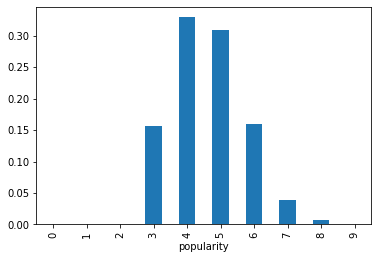

In [32]:
tablePopularity.plot.bar()
plt.show()

### Test Data Set

In [33]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels=[0,1,2,3,4,5,6,7,8,9]
len(bins),len(labels)

(11, 10)

In [34]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels=[0,1,2,3,4,5,6,7,8,9]
dfTestYearRandom['popularity'] = pd.cut(dfTestYearRandom['popularity'], bins=bins, labels=labels, include_lowest=True)
dfTestYearRandom.head()


artist_name                                track_name  \
0     Roddy Ricch                                   The Box   
1  Arizona Zervas                                   ROXANNE   
2     Post Malone                                   Circles   
3          DaBaby                                       BOP   
4      Juice WRLD  Bandit (with YoungBoy Never Broke Again)   

                 track_id popularity  explicit  year_song  acousticness  \
0  0nbXyq5TXYPCO7pr3N8S4I          9      True       2019        0.1040   
1  696DnlkuDOXcMAnKlTgXXK          9      True       2019        0.0522   
2  21jGcNKet2qwijlDFuPiPb          9     False       2019        0.1920   
3  6Ozh9Ok6h4Oi1wUSLtBseN          9      True       2019        0.1890   
4  6Gg1gjgKi2AK4e0qzsR7sd          9      True       2019        0.0687   

   danceability  duration_ms  energy  instrumentalness  key  liveness  \
0         0.896       196653   0.586           0.00000   10    0.7900   
1         0.621       163636   0.601           0.00000    6    0.4600   
2         0.695       215280   0.762           0.00244    0    0.0863   
3         0.769       159715   0.787           0.00000   11    0.1290   
4         0.474       189323   0.631           0.00000    5    0.1320   

   loudness  mode  speechiness    tempo  time_signature  valence  
0    -6.687     0       0.0559  116.971               4    0.642  
1    -5.616     0       0.1480  116.735               5    0.457  
2    -3.497     1       0.0395  120.042               4    0.553  
3    -3.909     1       0.3670  126.770               4    0.836  
4    -5.884     0       0.3430  180.051               4    0.425

#### Percentage of popularity types

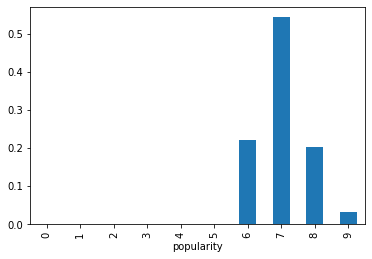

In [35]:
popularityPercentage = dfTestYearRandom.groupby('popularity')
tablePopularity = popularityPercentage["popularity"].count() / popularityPercentage["popularity"].count().sum()

tablePopularity.plot.bar()
plt.show()

In [36]:
len(dfTestYearRandom)/(len(dfTraining)+len(dfTestYearRandom))

0.0166973305099455

### Super unbalanced Test Data Set: New Strategy for Train and Test

Given that the API only provide a specific sample of songs, the levels of popularity is limited; so, we need this adjustment to make every model work.

In [37]:
len(bins), len(labels)

(11, 10)

In [38]:
bins = range(min(dfEncodedTarget['popularity']),max(dfEncodedTarget['popularity'])+1)
labels = []
for i in bins[:-1]:
        labels.append(i- min(dfEncodedTarget['popularity']))

dfEncodedTarget['popularity'] = pd.cut(dfEncodedTarget['popularity'], bins=bins, labels=labels, include_lowest=True)
dfEncodedTarget.head()


artist_name                track_name                track_id  \
0      Jason Mraz                 I'm Yours  1EzrEOXmMH3G43AXT1y7pA   
1  Zac Brown Band             Chicken Fried  4dGJf1SER1T6ooX46vwzRB   
2         Estelle              American Boy  22UDw8rSfLbUsaAGTXQ4Z8   
3      Kanye West                 Heartless  4EWCNWgDS8707fNSZ1oaA5   
4   The Offspring  You're Gonna Go Far, Kid  6TfBA04WJ3X1d1wXhaCFVT   

  popularity  explicit  year_song  acousticness  danceability  duration_ms  \
0          5     False       2008       0.59500         0.686       242187   
1          4     False       2008       0.64500         0.566       238147   
2          4      True       2008       0.17100         0.727       284733   
3          4     False       2008       0.05150         0.790       211000   
4          4      True       2008       0.00428         0.550       177827   

   energy  instrumentalness  key  liveness  loudness  mode  speechiness  \
0   0.457               0.0   11     0.105    -8.322     1       0.0468   
1   0.713               0.0    6     0.114    -4.250     1       0.0417   
2   0.729               0.0    0     0.070    -2.990     1       0.3260   
3   0.647               0.0   10     0.248    -5.983     0       0.1360   
4   0.917               0.0    0     0.197    -3.159     1       0.0638   

     tempo  time_signature  valence  
0  150.953               4    0.718  
1  169.864               4    0.807  
2  117.932               4    0.512  
3   87.999               4    0.654  
4  126.115               4    0.601

In [39]:

msk = np.random.rand(len(dfEncodedTarget)) < 0.8

dfEncodedTarget = df[msk]

dfTestYearRandom = df[~msk]

len(dfTestYearRandom)/(len(dfEncodedTarget)+len(dfTestYearRandom))

0.1975040598743204

#### Percentage of popularity types for Train

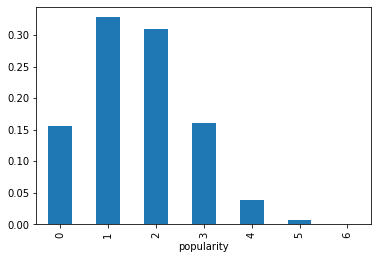

In [40]:
popularityPercentage = dfEncodedTarget.groupby('popularity')
tablePopularity = popularityPercentage["popularity"].count() / popularityPercentage["popularity"].count().sum()

tablePopularity.plot.bar()
plt.show()

In [41]:
tablePopularity.mean()

0.14285714285714285

#### Percentage of popularity types for Test

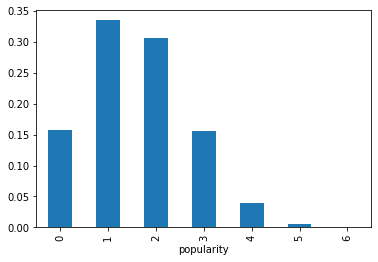

In [42]:
popularityPercentage = dfTestYearRandom.groupby('popularity')
tablePopularity = popularityPercentage["popularity"].count() / popularityPercentage["popularity"].count().sum()

tablePopularity.plot.bar()
plt.show()

[Go to Table of Contents](#init)

### Data Wrangling 2: Encoding of 'Explicit' and Selection of Numeric Variables
<a id= "datawrangling2"></a>

#### Train Data Set

In [43]:
dfEncoded = dfEncodedTarget
dfEncoded['explicit'] = dfEncoded['explicit'].map(lambda x: 0 if x == False else 1)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
dfEncoded = dfEncoded.iloc[:,3:]

In [45]:
dfEncoded.head()

popularity  explicit  year_song  acousticness  danceability  duration_ms  \
0          5         0       2008       0.59500         0.686       242187   
1          4         0       2008       0.64500         0.566       238147   
2          4         1       2008       0.17100         0.727       284733   
4          4         1       2008       0.00428         0.550       177827   
5          4         0       2008       0.27200         0.508       261640   

   energy  instrumentalness  key  liveness  loudness  mode  speechiness  \
0   0.457               0.0   11    0.1050    -8.322     1       0.0468   
1   0.713               0.0    6    0.1140    -4.250     1       0.0417   
2   0.729               0.0    0    0.0700    -2.990     1       0.3260   
4   0.917               0.0    0    0.1970    -3.159     1       0.0638   
5   0.720               0.0   11    0.0563    -5.908     0       0.0628   

     tempo  time_signature  valence  
0  150.953               4    0.718  
1  169.864               4    0.807  
2  117.932               4    0.512  
4  126.115               4    0.601  
5   79.983               4    0.472

#### Test Data Set

In [46]:
dfEncodedTest = dfTestYearRandom
dfEncodedTest['explicit'] = dfEncodedTest['explicit'].map(lambda x: 0 if x == False else 1)
dfEncodedTest = dfEncodedTest.iloc[:,3:]
dfEncodedTest.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


popularity  explicit  year_song  acousticness  danceability  duration_ms  \
3           4         0       2008        0.0515         0.790       211000   
6           4         0       2008        0.0941         0.485       242373   
7           4         0       2008        0.1730         0.630       261427   
10          4         1       2008        0.0387         0.673       221840   
11          4         1       2008        0.0161         0.680       249533   

    energy  instrumentalness  key  liveness  loudness  mode  speechiness  \
3    0.647          0.000000   10    0.2480    -5.983     0       0.1360   
6    0.619          0.000003    5    0.1090    -7.115     0       0.0289   
7    0.698          0.000000   10    0.0789    -4.510     1       0.0244   
10   0.695          0.002060    6    0.1940    -8.636     0       0.2780   
11   0.687          0.000000    9    0.2610    -6.162     0       0.0709   

      tempo  time_signature  valence  
3    87.999               4    0.654  
6   138.017               4    0.416  
7    94.023               4    0.529  
10  151.468               4    0.774  
11  150.053               4    0.467

[Go to Table of Contents](#init)

### Data Wrangling 3: 
<a id= "datawrangling3"></a>


#### Train Data

##### Scaling: 
<a id= "scaling"></a>


In [47]:
# INPUT: dfEncoded
# OUTPUT: predictiveVariablesScaled data scaled by MinMaxScaler to prepare data for the Lasso
        # popularityTarget 

scaler = MinMaxScaler()
predictiveVariablesScaled = pd.DataFrame(scaler.fit_transform(dfEncoded.iloc[:,1:]), columns=dfEncoded.iloc[:,1:].columns)
popularityTarget = dfEncoded['popularity']
predictiveVariablesScaled.head()


explicit  year_song  acousticness  danceability  duration_ms    energy  \
0       0.0        0.0      0.597390      0.695740     0.043541  0.456989   
1       0.0        0.0      0.647590      0.574037     0.042792  0.712994   
2       1.0        0.0      0.171687      0.737323     0.051425  0.728995   
3       1.0        0.0      0.004297      0.557809     0.031614  0.916998   
4       0.0        0.0      0.273092      0.515213     0.047146  0.719994   

   instrumentalness       key  liveness  loudness  mode  speechiness  \
0               0.0  1.000000    0.1050  0.824296   1.0     0.048750   
1               0.0  0.545455    0.1140  0.896456   1.0     0.043438   
2               0.0  0.000000    0.0700  0.918784   1.0     0.339583   
3               0.0  0.000000    0.1970  0.915789   1.0     0.066458   
4               0.0  1.000000    0.0563  0.867074   0.0     0.065417   

      tempo  time_signature   valence  
0  0.648730             0.8  0.720160  
1  0.730001             0.8  0.809428  
2  0.506820             0.8  0.513541  
3  0.541987             0.8  0.602808  
4  0.343732             0.8  0.473420

#### Test Data

##### Scaling: 
<a id= "scaling"></a>


In [48]:
# INPUT: dfEncoded
# OUTPUT: predictiveVariablesScaled data scaled by MinMaxScaler to prepare data for the Lasso
        # popularityTarget 

scaler = MinMaxScaler()
predictiveVariablesScaledTest = pd.DataFrame(scaler.fit_transform(dfEncodedTest.iloc[:,1:]), columns=dfEncodedTest.iloc[:,1:].columns)
popularityTargetTest = dfEncodedTest['popularity']
predictiveVariablesScaledTest.head()

explicit  year_song  acousticness  danceability  duration_ms    energy  \
0       0.0        0.0      0.051707      0.800405     0.044181  0.647641   
1       0.0        0.0      0.094478      0.491388     0.051852  0.619612   
2       0.0        0.0      0.173695      0.638298     0.056511  0.698693   
3       1.0        0.0      0.038855      0.681864     0.046832  0.695690   
4       1.0        0.0      0.016165      0.688956     0.053603  0.687682   

   instrumentalness       key  liveness  loudness  mode  speechiness  \
0          0.000000  0.909091  0.251777  0.882984   0.0     0.140787   
1          0.000003  0.454545  0.110660  0.862956   0.0     0.029917   
2          0.000000  0.909091  0.080102  0.909044   1.0     0.025259   
3          0.002060  0.545455  0.196954  0.836046   0.0     0.287785   
4          0.000000  0.818182  0.264975  0.879817   0.0     0.073395   

      tempo  time_signature   valence  
0  0.401216             0.8  0.659274  
1  0.629264             0.8  0.419355  
2  0.428681             0.8  0.533266  
3  0.690591             0.8  0.780242  
4  0.684139             0.8  0.470766

[Go to Table of Contents](#init)

# Lasso
<a id= "lasso"></a>


What LASSO does well is to provide a principled way to reduce the number of features in a model. LASSO involves a penalty factor that determines how many features are retained; using cross-validation to choose the penalty factor helps assure that the model will generalize well to future data samples.

If you need to cut down on the number of predictors for practical reasons, LASSO is a good choice. But all it does is give you a useful set of selected predictors, not necessarily the most important in some general sense.

When features are correlated, LASSO will choose one or the other based on its performance in the particular data sample at hand.
With a different sample it could well choose a different feature from a set of correlated features.

This is why we are interested in using Lasso for the complete data set.

In [49]:
# INPUT: predictiveVariablesScaled, variables scaled and prepared for the Lasso and popularityTarget
# OUTPUT: 
    # 'cs',the array of penalties for the Lasso method
    # depending on the variables selected.

start_time = time.time()

cs = l1_min_c(predictiveVariablesScaled, popularityTarget, loss='log') * np.logspace(0, 7, 16)

#We use the Logistic Regression to apply the penalties from the Lasso.
clf = linear_model.LogisticRegression(penalty='l1', solver='saga',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                     multi_class= 'multinomial')
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.01909017562866211 seconds ---


In [50]:
# ************************************************
# ATTENTION!!!! 763.1 s           Executing time!!*
# ************************************************
# INPUT: predictiveVariables, variables scaled and prepared for the Lasso and popularityTarget
# OUTPUT: fit the linear model to minimize the error function
        # for graphical purpose and see how Lasso selects the variables.
    
start_time = time.time()

coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X = predictiveVariablesScaled, y = popularityTarget)
    coefs_.append(clf.coef_.ravel().copy())
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 763.1988909244537 seconds ---


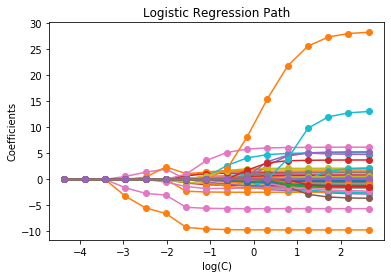

In [51]:
coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax  = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()

In [52]:
# INPUT: predictiveVariablesScaled and clf, the linear_model.LogisticRegression
# OUTPUT: lassoVariablesFilter, it has all the variables with its corresponding coefficient given by the Lasso.
    # If the coefficient == o, it means it shouldn't be included in the model.
    
start_time = time.time()
lassoVariablesFilter = []
# for coefs in range(0,clf.coef_.size):
for coefs in range(0,predictiveVariablesScaled.shape[1]):
    lassoVariablesFilter.append((predictiveVariablesScaled.columns[coefs], clf.coef_[0][coefs]))
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0003440380096435547 seconds ---


In [53]:
# INPUT:
    # lassoVariablesFilter, , it has all the variables with its corresponding coefficient given by the Lasso.
    # lassoVars,data of all the variables scaled by MinMaxScaler to prepare data for the Lasso
    # numericaAndCategoricalVariablesDataframe, dataframe with all variables.
    
# OUTPUT: lassoVariablesSelectedDataFrame, data frame with the data of the variables selected by the Lasso and scaled.
        # lassoVariablesSelectedNonScaledDataFrame, , data frame with the data of the variables selected by the Lasso.
start_time = time.time()
out_tup = [i for i in lassoVariablesFilter if i[1] == 0]
lassoVariablesSelected = [i for i in lassoVariablesFilter if i[1] != 0]

lassoVariablesSelectedDataFrame = predictiveVariablesScaled[list(map(lambda x: x[0] , lassoVariablesSelected))]
lassoVariablesSelectedNonScaledDataFrame = dfEncoded.iloc[:,1:][list(map(lambda x: x[0] , lassoVariablesSelected))]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.01439213752746582 seconds ---


[Go to Table of Contents](#init)

## Final Variables
<a id= "finalvars"></a>

All variables are important based on the Lasso model.

In [54]:
lassoVariablesSelected, len(lassoVariablesSelected)

([('explicit', -0.07153324599907189),
  ('year_song', -9.702644827469165),
  ('acousticness', -0.3254471074277977),
  ('danceability', -1.2073589518844228),
  ('duration_ms', -2.8156027992892434),
  ('energy', 0.01184728627651793),
  ('instrumentalness', 0.3899812786757341),
  ('key', 0.041241030799594784),
  ('liveness', 0.25354062649132436),
  ('loudness', -0.6421474270361321),
  ('mode', 0.24023488849848687),
  ('speechiness', 1.9882322610031846),
  ('tempo', -0.08274000034546936),
  ('time_signature', -0.4471910261268723),
  ('valence', -0.008273612271184968)],
 15)

The regularization of the Lasso model seems to consider all the variables as important, although 'year_song' seems to be much more important than the rest. Here we see for the first time that 'year_song' damages the objective of the study because its objective is to extract the characteristics of the songs to advise the artists or the company, and there is nothing to do about the year.

[Go to Table of Contents](#init)

# Data Dictionary
<a id= "datadictionary"></a>


## Predictive Variables
<a id= "predictivevariables"></a>

| Feature          | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                                                                                                                                                                                                                                               |
|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| artist_name      | The artists who performed the track. Each artist object includes a link in href to more detailed information about the artist.                                                                                                                                                                                                                                                                                                                                                                                     |                                                                                                                                                                                                                                               |
| track_name       | The name of the track.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |                                                                                                                                                                                                                                               |
| track_id         | The Spotify ID for the track.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |                                                                                                                                                                                                                                               |
| explicit         | Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).                                                                                                                                                                                                                                                                                                                                                                                                             |                                                                                                                                                                                                                                               |
| acousticness     | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.                                                                                                                                                                                                                                                                                                                                                                                       |                                                                                                                                                                                                                                               |
| danceability     | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
| duration_ms_y    | The duration of the track in milliseconds.                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                               |
| energy           | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.                                                                                                                          |                                                                                                                                                                                                                                               |
| instrumentalness | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.                                                                                                                 |                                                                                                                                                                                                                                               |
| key              | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                               |
| liveness         | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                               |
| loudness         | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.                                                                                                                                                                                       |                                                                                                                                                                                                                                               |
| mode             | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.                                                                                                                                                                                                                                                                                                                                                    |                                                                                                                                                                                                                                               |
| speechiness      | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |                                                                                                                                                                                                                                               |
| tempo            | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                               |
| time_signature   | An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).                                                                                                                                                                                                                                                                                                                                                      |                                                                                                                                                                                                                                               |
| valence          | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).                                                                                                                                                                                                                                                                  |                                                                                                                                                                                                                                               |

[Go to Table of Contents](#init)

## Target Variable
<a id= "targetvariables"></a>



| Feature    | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
|------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| popularity | The popularity of the track. The   value will be between 0 and 100, with 100 being the most popular. The   popularity of a track is a value between 0 and 100, with 100 being the most   popular. The popularity is calculated by algorithm and is based, in the most   part, on the total number of plays the track has had and how recent those   plays are. Generally speaking, songs that are being played a lot now will   have a higher popularity than songs that were played a lot in the past. |

[Go to Table of Contents](#init)

# Exploratory Data Analysis
<a id= "eda"></a>

In [55]:
def edaCategorical2 (var="explicit", classifier = "popularity", df = dfEncoded, wShowing = "Contingency Table"):
    varDataFrame = pd.DataFrame(df[str(var)])
    classifierDataFrame = pd.DataFrame(dfEncoded[str(classifier)])
    varClassifierDataFrame = pd.concat([varDataFrame, classifierDataFrame], axis=1, sort=False)
    #Contingency table
    data_crosstab = pd.crosstab(varClassifierDataFrame[str(var)],
                            varClassifierDataFrame[str(classifier)],
                               margins = False)
    p = plt.figure()
    #Histogram based on type
    varClassifierDataFrame1 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 1]
    varClassifierDataFrame2 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 2]
    varClassifierDataFrame3 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 3]
    varClassifierDataFrame4 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 4]
    varClassifierDataFrame5 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 5]
    varClassifierDataFrame6 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 6]
    varClassifierDataFrame7 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 7]
    varClassifierDataFrame8 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 8]
    varClassifierDataFrame9 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 9]
    varClassifierDataFrame10 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 10]
    
    # Method 1: on the same Axis
    
    sns.distplot( varClassifierDataFrame1[str(var)] , color="skyblue", label="1")
    sns.distplot( varClassifierDataFrame2[str(var)] , color="red", label="2")
    sns.distplot( varClassifierDataFrame3[str(var)] , color="blue", label="3")
    sns.distplot( varClassifierDataFrame4[str(var)] , color="green", label="4")
    sns.distplot( varClassifierDataFrame5[str(var)] , color="black", label="5")
    sns.distplot( varClassifierDataFrame6[str(var)] , color="gold", label="6")
    sns.distplot( varClassifierDataFrame7[str(var)] , color="grey", label="7")
    sns.distplot( varClassifierDataFrame8[str(var)] , color="purple", label="8")
    sns.distplot( varClassifierDataFrame9[str(var)] , color="yellow", label="9")
    sns.distplot( varClassifierDataFrame10[str(var)] , color="orange", label="10")
    plt.legend()
  
    #Global histogram
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    # Add a graph in each part
    sns.boxplot(varClassifierDataFrame[str(var)], ax=ax_box)
    sns.distplot(varClassifierDataFrame[str(var)], ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.close()
    return f

In [56]:
def edaNumeric2 (var, classifier= "popularity", df=dfEncoded, wShowing = "BoxPLot"):
    
    varDataFrame = pd.DataFrame(df[str(var)])
    classifierDataFrame = pd.DataFrame(dfEncoded[str(classifier)])
    varClassifierDataFrame = pd.concat([varDataFrame, classifierDataFrame], axis=1, sort=False)
    b = plt.figure()
    
    #Boxplot
    ax = sns.boxplot(x= str(classifier), y= str(var), data=varClassifierDataFrame)
    # Calculate number of obs per group & median to position labels
    medians = varClassifierDataFrame.groupby([str(classifier)])[str(var)].median().values
    nobs = varClassifierDataFrame[str(var)].value_counts().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]
    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
        horizontalalignment='center', size='x-small', color='w', weight='semibold')
    # plt.close()
    h = plt.figure()
    #Histogram based on type
    varClassifierDataFrame1 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 1]
    varClassifierDataFrame2 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 2]
    varClassifierDataFrame3 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 3]
    varClassifierDataFrame4 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 4]
    varClassifierDataFrame5 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 5]
    varClassifierDataFrame6 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 6]
    varClassifierDataFrame7 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 7]
    varClassifierDataFrame8 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 8]
    varClassifierDataFrame9 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 9]
    varClassifierDataFrame10 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 10]

    # Method 1: on the same Axis
    sns.distplot( varClassifierDataFrame1[str(var)] , color="skyblue", label="1")
    sns.distplot( varClassifierDataFrame2[str(var)] , color="red", label="2")
    sns.distplot( varClassifierDataFrame3[str(var)] , color="blue", label="3")
    sns.distplot( varClassifierDataFrame4[str(var)] , color="green", label="4")
    sns.distplot( varClassifierDataFrame5[str(var)] , color="black", label="5")
    sns.distplot( varClassifierDataFrame6[str(var)] , color="gold", label="6")
    sns.distplot( varClassifierDataFrame7[str(var)] , color="grey", label="7")
    sns.distplot( varClassifierDataFrame8[str(var)] , color="purple", label="8")
    sns.distplot( varClassifierDataFrame9[str(var)] , color="yellow", label="9")
    sns.distplot( varClassifierDataFrame10[str(var)] , color="orange", label="10")
    
    plt.legend()
    # plt.close()
    plt.figure()
    
    #Global histogram
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    # Add a graph in each part
    sns.boxplot(varClassifierDataFrame[str(var)], ax=ax_box)
    sns.distplot(varClassifierDataFrame[str(var)], ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.close()
    
    return f

[Go to Table of Contents](#init)

## Numeric variables for the model
<a id= "numeric"></a>

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


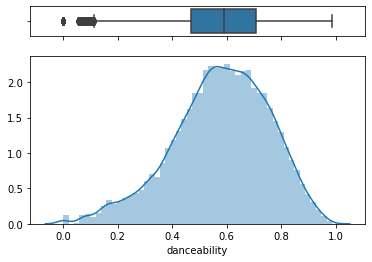

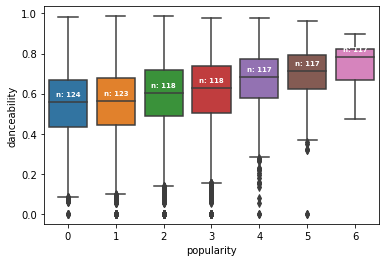

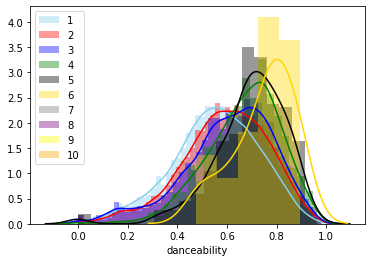

<Figure size 432x288 with 0 Axes>

In [57]:
edaNumeric2 (var = 'danceability', classifier= "popularity", df = dfEncoded, wShowing = "BoxPLot")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


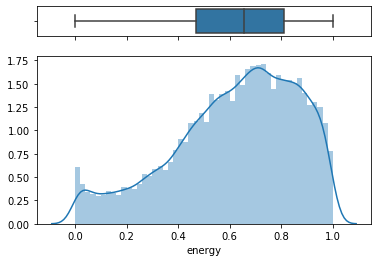

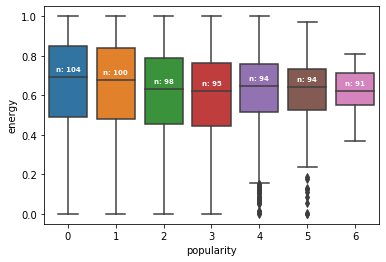

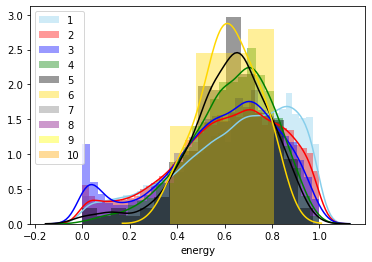

<Figure size 432x288 with 0 Axes>

In [58]:
edaNumeric2 (var = 'energy', classifier= "popularity", df = dfEncoded, wShowing = "BoxPLot")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


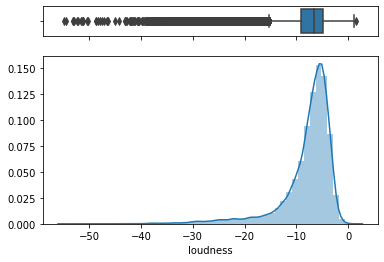

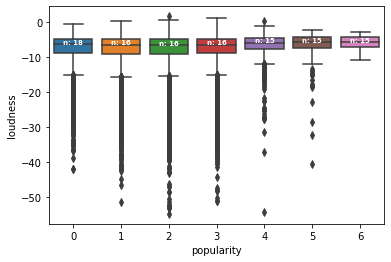

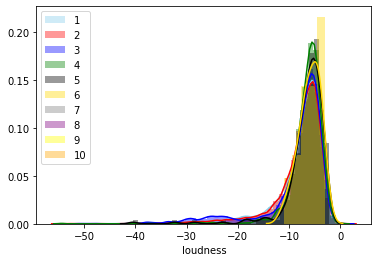

<Figure size 432x288 with 0 Axes>

In [59]:
edaNumeric2 (var = 'loudness', classifier= "popularity", df = dfEncoded, wShowing = "BoxPLot")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


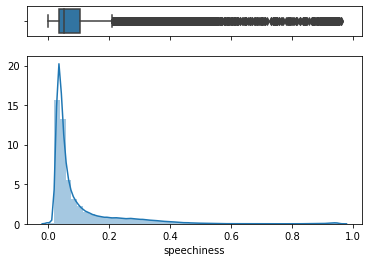

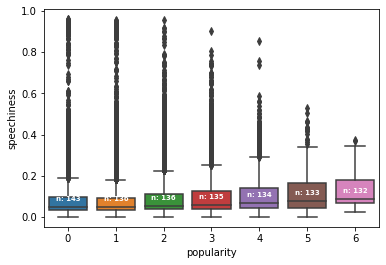

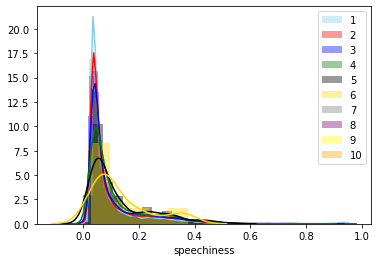

<Figure size 432x288 with 0 Axes>

In [60]:
edaNumeric2 (var = 'speechiness', classifier= "popularity", df = dfEncoded, wShowing = "BoxPLot")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


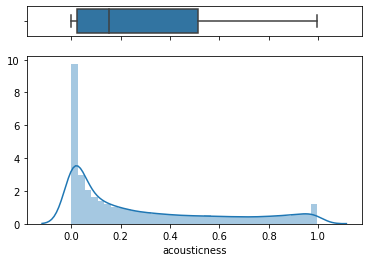

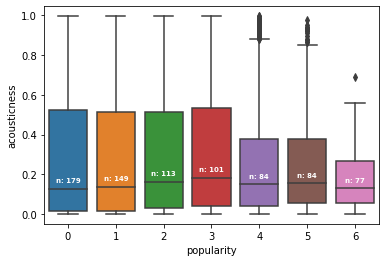

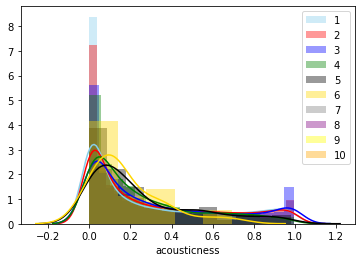

<Figure size 432x288 with 0 Axes>

In [61]:
edaNumeric2 (var = 'acousticness', classifier= "popularity", df = dfEncoded, wShowing = "BoxPLot")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


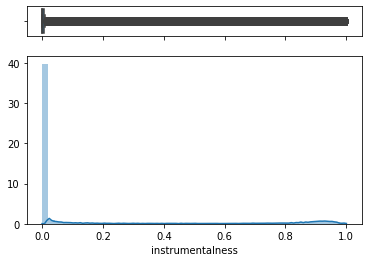

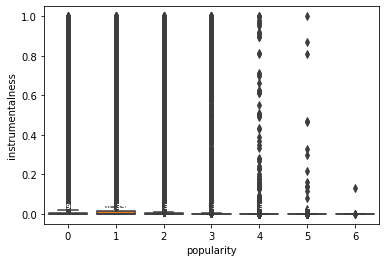

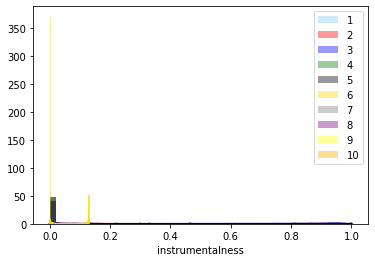

<Figure size 432x288 with 0 Axes>

In [62]:
edaNumeric2 (var = 'instrumentalness', classifier= "popularity", df = dfEncoded, wShowing = "BoxPLot")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


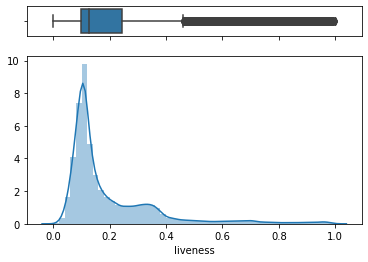

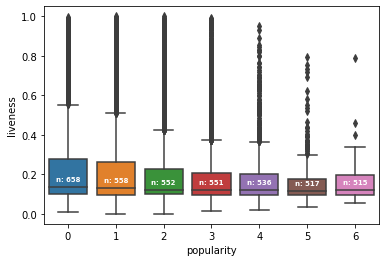

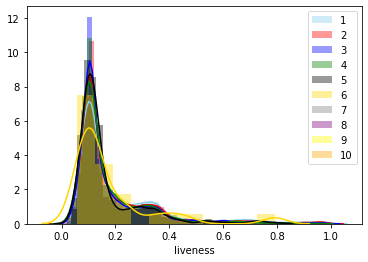

<Figure size 432x288 with 0 Axes>

In [63]:
edaNumeric2 (var = 'liveness', classifier= "popularity", df = dfEncoded, wShowing = "BoxPLot")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


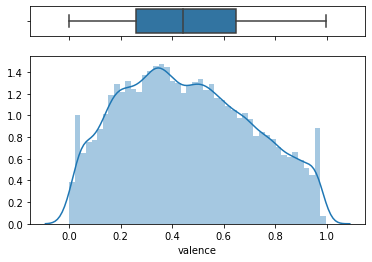

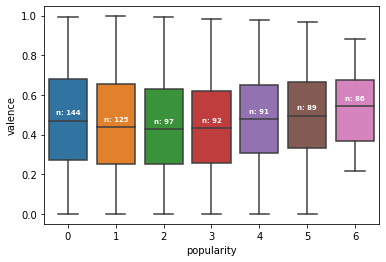

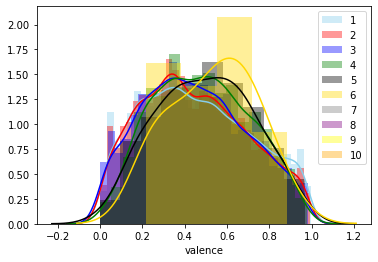

<Figure size 432x288 with 0 Axes>

In [64]:
edaNumeric2 (var = 'valence', classifier= "popularity", df = dfEncoded, wShowing = "BoxPLot")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


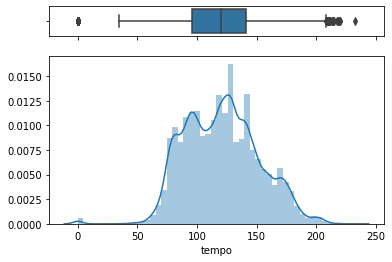

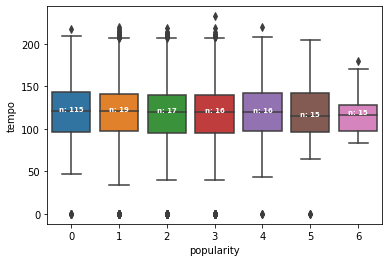

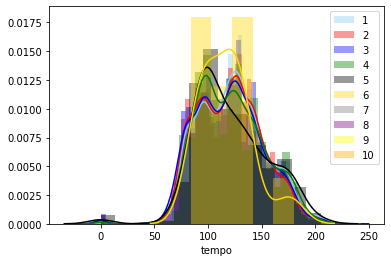

<Figure size 432x288 with 0 Axes>

In [65]:
edaNumeric2 (var = 'tempo', classifier= "popularity", df = dfEncoded, wShowing = "BoxPLot")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


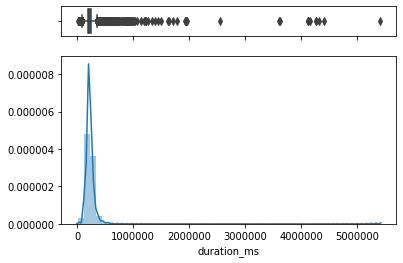

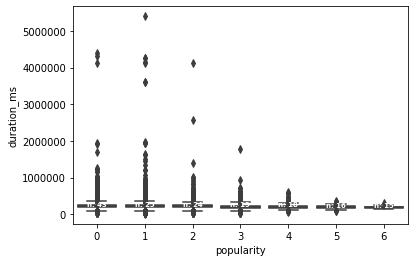

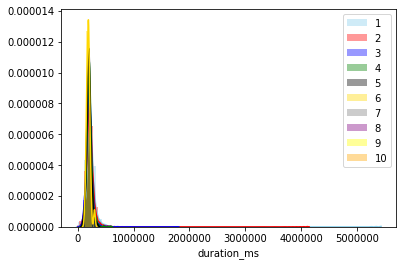

<Figure size 432x288 with 0 Axes>

In [66]:
edaNumeric2 (var = 'duration_ms', classifier= "popularity", df = dfEncoded, wShowing = "BoxPLot")

[Go to Table of Contents](#init)

## Categorical Variables for the model
<a id= "categorical"></a>

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


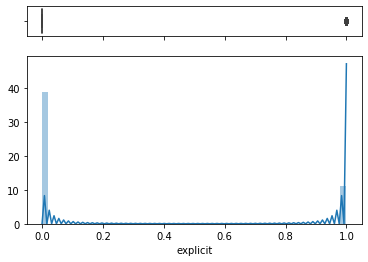

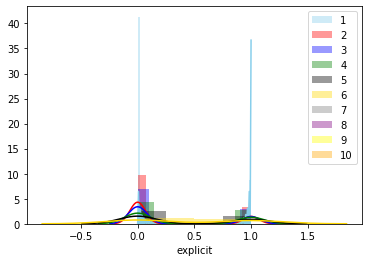

In [67]:
 edaCategorical2 (var="explicit", classifier = "popularity", df = dfEncoded, wShowing = "Contingency Table")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


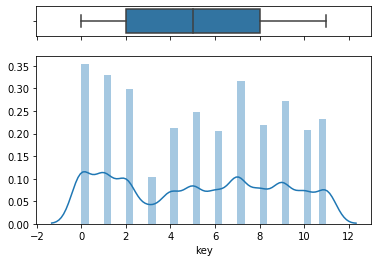

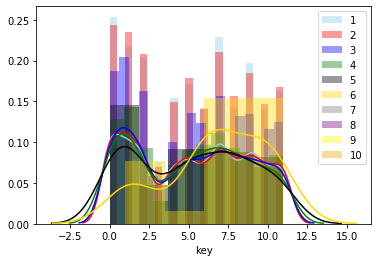

In [68]:
 edaCategorical2 (var="key", classifier = "popularity", df = dfEncoded, wShowing = "Contingency Table")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


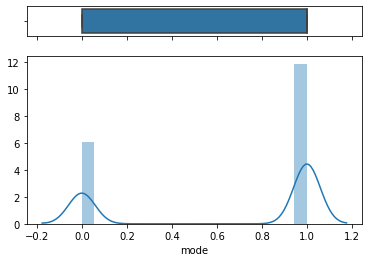

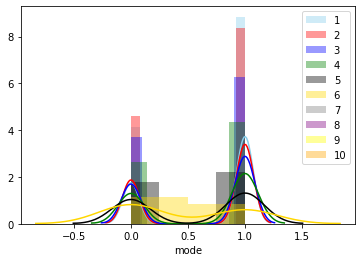

In [69]:
 edaCategorical2 (var="mode", classifier = "popularity", df = dfEncoded, wShowing = "Contingency Table")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


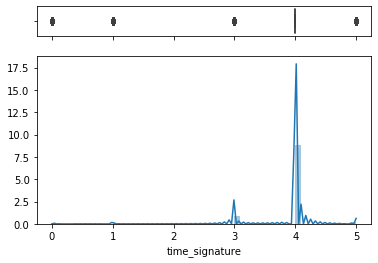

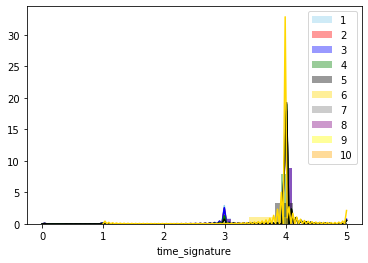

In [70]:
 edaCategorical2 (var="time_signature", classifier = "popularity", df = dfEncoded, wShowing = "Contingency Table")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


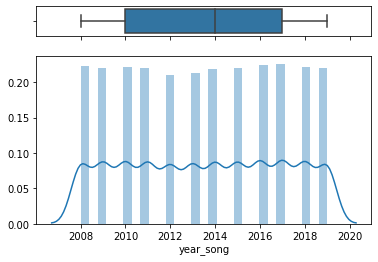

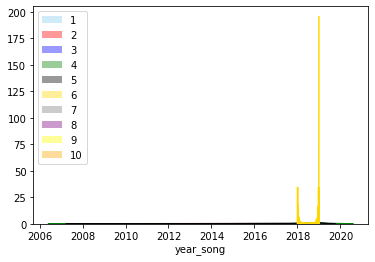

In [71]:
 edaCategorical2 (var="year_song", classifier = "popularity", df = dfEncoded, wShowing = "Contingency Table")
    
    

[Go to Table of Contents](#init)

### Correlation Matrix
<a id= "correlationmatrix"></a>

In [72]:
corDf = dfEncoded.drop(['mode', 'explicit'], axis=1)

In [73]:
corDf['popularity'] = pd.to_numeric(corDf['popularity'])

In [74]:
# Compute the correlation matrix
corr = corDf.corr()


In [75]:

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


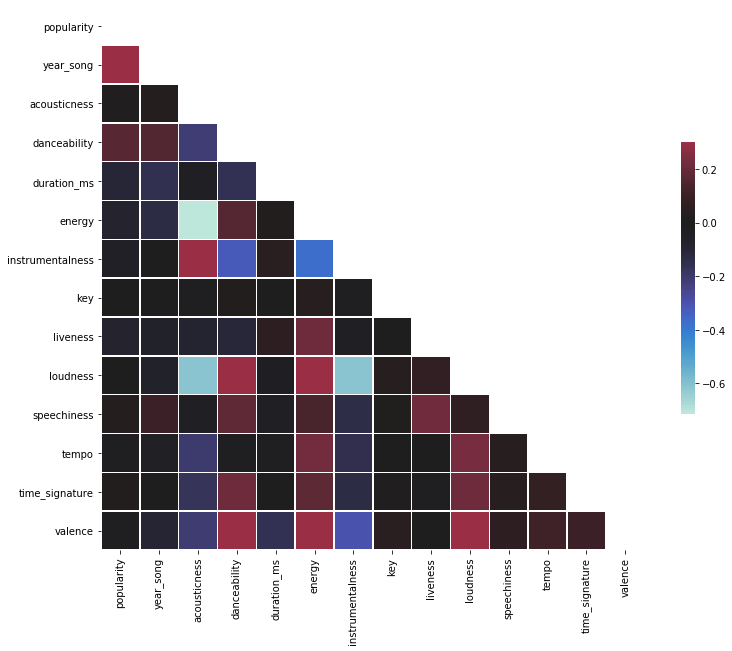

In [76]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

[Go to Table of Contents](#init)

# Modeling
<a id= "modeling"></a>

We are going to evaluate each model with the following scores.

In [77]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

##  Train and Test Data Sets
<a id= "traintest"></a>


In [78]:
X_train = predictiveVariablesScaled.drop('year_song', axis = 1)
y_train = popularityTarget

X_test = predictiveVariablesScaledTest.drop('year_song', axis = 1)
y_test = popularityTargetTest

In [79]:
labelsMatrix = []
for i in labels:
    labelsMatrix.append(str(i))

labelsMatrix

['0', '1', '2', '3', '4', '5', '6']

[Go to Table of Contents](#init)

## Logistic Regression
<a id= "logisticregression"></a>

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability. We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function. The hypothesis of logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.

We expect our classifier to give us a set of outputs or classes based on probability when we pass the inputs through a prediction function and returns a probability score between 0 and 1. We decide with a threshold value above which we classify values into Class 1 and of the value goes below the threshold then we classify it in Class 2. The threshold is set by optimizaing (minimizing) a score (cost function); which in our case are the three scores mentioned at the begining of this report.

<img src="../images/logistic.png" style="width: 600px">

[Go to Table of Contents](#init)

In [80]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [82]:
lr = LogisticRegression(fit_intercept = False, C = 1e9, multi_class = 'multinomial', solver= 'newton-cg' )
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

### Train's Scores

In [83]:
# fit a model
lr = LogisticRegression(fit_intercept = False, C = 1e9);
model = lr.fit(X_train, y_train);
predictionsTest = lr.predict(X_test);
predictionsTrain = lr.predict(X_train);

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [84]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsTrain)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)



print("\n")
print(classification_report(y_train, predictionsTrain)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0  25.0 5033.0 2031.0   0.0   0.0   0.0   0.0 
        1  17.0 10052.0 4836.0   0.0   0.0   0.0   0.0 
        2   1.0 7487.0 6550.0   3.0   0.0   0.0   0.0 
        3   0.0 3393.0 3928.0   0.0   0.0   0.0   0.0 
        4   0.0 627.0 1155.0   0.0   0.0   0.0   0.0 
        5   0.0  93.0 206.0   0.0   0.0   0.0   0.0 
        6   0.0   2.0  24.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.58      0.00      0.01      7089
           1       0.38      0.67      0.48     14905
           2       0.35      0.47      0.40     14041
           3       0.00      0.00      0.00      7321
           4       0.00      0.00      0.00      1782
           5       0.00      0.00      0.00       299
           6       0.00      0.00      0.00        26

    accuracy                           0.37     45463
   macro avg       0.19      0.16      0.13     45463
wei

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Test's Scores

In [85]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsTest)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)



print("\n")
print(classification_report(y_test, predictionsTest)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0   8.0 1360.0 394.0   0.0   0.0   0.0   0.0 
        1   4.0 2748.0 990.0   0.0   0.0   0.0   0.0 
        2   1.0 2059.0 1367.0   2.0   0.0   0.0   0.0 
        3   1.0 919.0 829.0   0.0   0.0   0.0   0.0 
        4   0.0 179.0 265.0   0.0   0.0   0.0   0.0 
        5   0.0  17.0  39.0   0.0   0.0   0.0   0.0 
        6   0.0   2.0   5.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.57      0.00      0.01      1762
           1       0.38      0.73      0.50      3742
           2       0.35      0.40      0.37      3429
           3       0.00      0.00      0.00      1749
           4       0.00      0.00      0.00       444
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00         7

    accuracy                           0.37     11189
   macro avg       0.19      0.16      0.13     11189
weighted 

[Go to Table of Contents](#init)

### Feature Importance
<a id= "featureimportancerandomlogistic"></a>

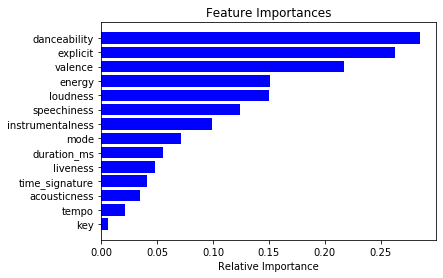

In [86]:
features = X_train.columns


importances = np.abs(np.array(np.std(X_train)) * model.coef_)
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices[0])), importances[0][indices[0]], color='b', align='center')
plt.yticks(range(len(indices[0])), [features[i] for i in indices[0]])
plt.xlabel('Relative Importance')
plt.show()

In [87]:
lista = []
for i in indices[0]:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf

Feature Importance
0        danceability
1            explicit
2             valence
3              energy
4            loudness
5         speechiness
6    instrumentalness
7                mode
8         duration_ms
9            liveness
10     time_signature
11       acousticness
12              tempo
13                key

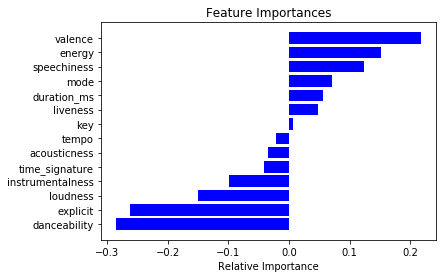

In [88]:
features = X_train.columns
#features = iris['feature_names']

importances = np.array(np.std(X_train)) * model.coef_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices[0])), importances[0][indices[0]], color='b', align='center')
plt.yticks(range(len(indices[0])), [features[i] for i in indices[0]])
plt.xlabel('Relative Importance')
plt.show()

#### Feature Importance Ditectely Propontional Higher Popularity

In [89]:
lista = []
for i in indices[0]:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf.head(10)

Feature Importance
0            valence
1             energy
2        speechiness
3               mode
4        duration_ms
5           liveness
6                key
7              tempo
8       acousticness
9     time_signature

#### Feature Importance Inversely Proportional to Popularity

In [90]:
featureImportancedf.head(10).iloc[::-1]

Feature Importance
9     time_signature
8       acousticness
7              tempo
6                key
5           liveness
4        duration_ms
3               mode
2        speechiness
1             energy
0            valence

[Go to Table of Contents](#init)

## Support Vector Machine
<a id= "svm"></a>

The plan is to use different and more complex models each time in order to improve the prediction (i.e. the scores and results). 

The next model used is __Support Vector Machine__. SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

According to the SVM algorithm we find the points closest to the line from both classes. These points are called support vectors. We compute the distance between the line and the support vectors, this distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane.

<img src="../images/svm.png" style="width: 400px">


__KERNEL__
<a id= "kernel"></a>

In machine learning, a “kernel” is usually used to refer to the kernel trick, a method of __using a linear classifier to solve a non-linear problem__. It entails transforming linearly inseparable data to linearly separable ones. The kernel function is what is applied on each data instance to map the original non-linear observations into a higher-dimensional space in which they become separable.

<img src="../images/kernel.png" style="width: 600px">

[Go to Table of Contents](#init)

### Linear Kernel
<a id= "linearkernel"></a>

In [91]:
clf = svm.SVC()
modelSvm = clf.fit(X_train, y_train)
predictionsSvm = clf.predict(X_test)

linear_svc = svm.SVC(kernel='linear')
linear_svc = linear_svc.fit(X_train, y_train)
linear_svc.kernel
predictionsSvmTest = linear_svc.predict(X_test)
predictionsSvmTrain = linear_svc.predict(X_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Train's Scores

In [92]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsSvmTrain)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_train, predictionsSvmTrain)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0   0.0 6086.0 1003.0   0.0   0.0   0.0   0.0 
        1   0.0 12322.0 2583.0   0.0   0.0   0.0   0.0 
        2   0.0 10470.0 3571.0   0.0   0.0   0.0   0.0 
        3   0.0 5138.0 2183.0   0.0   0.0   0.0   0.0 
        4   0.0 1101.0 681.0   0.0   0.0   0.0   0.0 
        5   0.0 189.0 110.0   0.0   0.0   0.0   0.0 
        6   0.0  14.0  12.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7089
           1       0.35      0.83      0.49     14905
           2       0.35      0.25      0.30     14041
           3       0.00      0.00      0.00      7321
           4       0.00      0.00      0.00      1782
           5       0.00      0.00      0.00       299
           6       0.00      0.00      0.00        26

    accuracy                           0.35     45463
   macro avg       0.10      0.15      0.11     45463
we

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Test's Scores

In [93]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsSvmTest)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_test, predictionsSvmTest)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0   0.0 1513.0 249.0   0.0   0.0   0.0   0.0 
        1   0.0 3157.0 585.0   0.0   0.0   0.0   0.0 
        2   0.0 2575.0 854.0   0.0   0.0   0.0   0.0 
        3   0.0 1218.0 531.0   0.0   0.0   0.0   0.0 
        4   0.0 288.0 156.0   0.0   0.0   0.0   0.0 
        5   0.0  31.0  25.0   0.0   0.0   0.0   0.0 
        6   0.0   5.0   2.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1762
           1       0.36      0.84      0.50      3742
           2       0.36      0.25      0.29      3429
           3       0.00      0.00      0.00      1749
           4       0.00      0.00      0.00       444
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00         7

    accuracy                           0.36     11189
   macro avg       0.10      0.16      0.11     11189
weighted 

### Feature Importance
<a id= "featureimportancerandomSVM"></a>

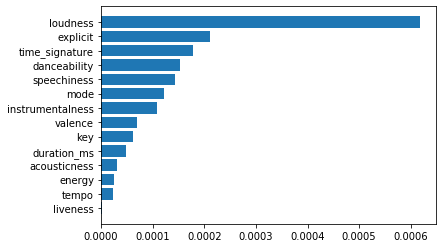

In [94]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = [X_train.columns]
f_importances(abs(linear_svc.coef_[0]), list(features_names[0]))

In [95]:
lista = []
importances = abs(linear_svc.coef_)
indices = np.argsort(importances)

for i in indices[0]:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf

Feature Importance
0            loudness
1            explicit
2      time_signature
3        danceability
4         speechiness
5                mode
6    instrumentalness
7             valence
8                 key
9         duration_ms
10       acousticness
11             energy
12              tempo
13           liveness

[Go to Table of Contents](#init)

### Polynomial Kernel
<a id= "polykernel"></a>

In [96]:
linearPoly = svm.SVC(kernel='poly', degree = 4)
linearPoly.kernel
modelSvm = linearPoly.fit(X_train, y_train)
predictionsPolyTest = linearPoly.predict(X_test)
predictionsPolyTrain = linearPoly.predict(X_train)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Train's Scores

In [97]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsPolyTrain)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_train, predictionsPolyTrain)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0   1.0 6218.0 870.0   0.0   0.0   0.0   0.0 
        1   0.0 12461.0 2444.0   0.0   0.0   0.0   0.0 
        2   0.0 10514.0 3527.0   0.0   0.0   0.0   0.0 
        3   0.0 5152.0 2169.0   0.0   0.0   0.0   0.0 
        4   0.0 1105.0 677.0   0.0   0.0   0.0   0.0 
        5   0.0 189.0 110.0   0.0   0.0   0.0   0.0 
        6   0.0  14.0  12.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      7089
           1       0.35      0.84      0.49     14905
           2       0.36      0.25      0.30     14041
           3       0.00      0.00      0.00      7321
           4       0.00      0.00      0.00      1782
           5       0.00      0.00      0.00       299
           6       0.00      0.00      0.00        26

    accuracy                           0.35     45463
   macro avg       0.24      0.16      0.11     45463
wei

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Test's Scores

In [98]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsPolyTest)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_test, predictionsPolyTest)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0   0.0 1539.0 223.0   0.0   0.0   0.0   0.0 
        1   0.0 3187.0 555.0   0.0   0.0   0.0   0.0 
        2   0.0 2586.0 843.0   0.0   0.0   0.0   0.0 
        3   0.0 1225.0 524.0   0.0   0.0   0.0   0.0 
        4   0.0 288.0 156.0   0.0   0.0   0.0   0.0 
        5   0.0  32.0  24.0   0.0   0.0   0.0   0.0 
        6   0.0   5.0   2.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1762
           1       0.36      0.85      0.51      3742
           2       0.36      0.25      0.29      3429
           3       0.00      0.00      0.00      1749
           4       0.00      0.00      0.00       444
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00         7

    accuracy                           0.36     11189
   macro avg       0.10      0.16      0.11     11189
weighted 

[Go to Table of Contents](#init)

### Radial Basis Function Kernel
<a id= "rbfkernel"></a>

In [99]:
linearRbf = svm.SVC(kernel='rbf')
linearRbf.kernel
modelSvm = linearRbf.fit(X_train, y_train)
predictionsRbvTest = linearRbf.predict(X_test)
predictionsRbvTrain = linearRbf.predict(X_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Train's Scores

In [100]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsRbvTrain)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_train, predictionsRbvTrain)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0   0.0 6125.0 964.0   0.0   0.0   0.0   0.0 
        1   0.0 12260.0 2645.0   0.0   0.0   0.0   0.0 
        2   0.0 10171.0 3870.0   0.0   0.0   0.0   0.0 
        3   0.0 4946.0 2375.0   0.0   0.0   0.0   0.0 
        4   0.0 1075.0 707.0   0.0   0.0   0.0   0.0 
        5   0.0 183.0 116.0   0.0   0.0   0.0   0.0 
        6   0.0  12.0  14.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7089
           1       0.35      0.82      0.49     14905
           2       0.36      0.28      0.31     14041
           3       0.00      0.00      0.00      7321
           4       0.00      0.00      0.00      1782
           5       0.00      0.00      0.00       299
           6       0.00      0.00      0.00        26

    accuracy                           0.35     45463
   macro avg       0.10      0.16      0.12     45463
wei

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Test's Scores

In [101]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsRbvTest)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_test, predictionsRbvTest)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0   0.0 1521.0 241.0   0.0   0.0   0.0   0.0 
        1   0.0 3131.0 611.0   0.0   0.0   0.0   0.0 
        2   0.0 2494.0 935.0   0.0   0.0   0.0   0.0 
        3   0.0 1183.0 566.0   0.0   0.0   0.0   0.0 
        4   0.0 274.0 170.0   0.0   0.0   0.0   0.0 
        5   0.0  28.0  28.0   0.0   0.0   0.0   0.0 
        6   0.0   4.0   3.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1762
           1       0.36      0.84      0.51      3742
           2       0.37      0.27      0.31      3429
           3       0.00      0.00      0.00      1749
           4       0.00      0.00      0.00       444
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00         7

    accuracy                           0.36     11189
   macro avg       0.10      0.16      0.12     11189
weighted 

[Go to Table of Contents](#init)

### Sigmoid Kernel
<a id= "sigmoidkernel"></a>

In [102]:
linearSigmoid = svm.SVC(kernel='sigmoid')
linearSigmoid.kernel
modelSvm = linearSigmoid.fit(X_train, y_train)
predictionsSigmoidTest = linearSigmoid.predict(X_test)
predictionsSigmoidTrain = linearSigmoid.predict(X_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### Train's Scores

In [103]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsSigmoidTrain)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_train, predictionsSigmoidTrain)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0   0.0 5328.0 1760.0   1.0   0.0   0.0   0.0 
        1   2.0 10881.0 4020.0   2.0   0.0   0.0   0.0 
        2   1.0 9492.0 4538.0  10.0   0.0   0.0   0.0 
        3   0.0 4814.0 2505.0   2.0   0.0   0.0   0.0 
        4   0.0 1144.0 638.0   0.0   0.0   0.0   0.0 
        5   0.0 173.0 126.0   0.0   0.0   0.0   0.0 
        6   0.0  13.0  13.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7089
           1       0.34      0.73      0.47     14905
           2       0.33      0.32      0.33     14041
           3       0.13      0.00      0.00      7321
           4       0.00      0.00      0.00      1782
           5       0.00      0.00      0.00       299
           6       0.00      0.00      0.00        26

    accuracy                           0.34     45463
   macro avg       0.12      0.15      0.11     45463
wei

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Test's Scores

In [104]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsSigmoidTest)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_test, predictionsSigmoidTest)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0   0.0 1312.0 449.0   1.0   0.0   0.0   0.0 
        1   0.0 2769.0 973.0   0.0   0.0   0.0   0.0 
        2   0.0 2356.0 1071.0   2.0   0.0   0.0   0.0 
        3   0.0 1150.0 598.0   1.0   0.0   0.0   0.0 
        4   0.0 283.0 161.0   0.0   0.0   0.0   0.0 
        5   0.0  43.0  13.0   0.0   0.0   0.0   0.0 
        6   0.0   3.0   4.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1762
           1       0.35      0.74      0.48      3742
           2       0.33      0.31      0.32      3429
           3       0.25      0.00      0.00      1749
           4       0.00      0.00      0.00       444
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00         7

    accuracy                           0.34     11189
   macro avg       0.13      0.15      0.11     11189
weighted

[Go to Table of Contents](#init)

### Radial Basis Function Kernel
<a id= "rbfkernel"></a>

In [105]:
linearRbf = svm.SVC(kernel='rbf')
linearRbf.kernel
modelSvm = linearRbf.fit(X_train, y_train)
predictionsRbvTest = linearRbf.predict(X_test)
predictionsRbvTrain = linearRbf.predict(X_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Train's Scores

In [106]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsRbvTrain)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_train, predictionsRbvTrain)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0   0.0 6125.0 964.0   0.0   0.0   0.0   0.0 
        1   0.0 12260.0 2645.0   0.0   0.0   0.0   0.0 
        2   0.0 10171.0 3870.0   0.0   0.0   0.0   0.0 
        3   0.0 4946.0 2375.0   0.0   0.0   0.0   0.0 
        4   0.0 1075.0 707.0   0.0   0.0   0.0   0.0 
        5   0.0 183.0 116.0   0.0   0.0   0.0   0.0 
        6   0.0  12.0  14.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7089
           1       0.35      0.82      0.49     14905
           2       0.36      0.28      0.31     14041
           3       0.00      0.00      0.00      7321
           4       0.00      0.00      0.00      1782
           5       0.00      0.00      0.00       299
           6       0.00      0.00      0.00        26

    accuracy                           0.35     45463
   macro avg       0.10      0.16      0.12     45463
wei

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Test's Scores

In [107]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsRbvTest)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_test, predictionsRbvTest)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0   0.0 1521.0 241.0   0.0   0.0   0.0   0.0 
        1   0.0 3131.0 611.0   0.0   0.0   0.0   0.0 
        2   0.0 2494.0 935.0   0.0   0.0   0.0   0.0 
        3   0.0 1183.0 566.0   0.0   0.0   0.0   0.0 
        4   0.0 274.0 170.0   0.0   0.0   0.0   0.0 
        5   0.0  28.0  28.0   0.0   0.0   0.0   0.0 
        6   0.0   4.0   3.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1762
           1       0.36      0.84      0.51      3742
           2       0.37      0.27      0.31      3429
           3       0.00      0.00      0.00      1749
           4       0.00      0.00      0.00       444
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00         7

    accuracy                           0.36     11189
   macro avg       0.10      0.16      0.12     11189
weighted 

[Go to Table of Contents](#init)

## Random Forest
<a id= "randomforest"></a>

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.


<img src="../images/randomforest.png" style="width: 400px">

- Bootstrap Aggregation (or Bagging for short), is a simple and very powerful __ensemble method__.
An ensemble method is a technique that __combines the predictions from multiple machine learning algorithms together__ to make more accurate predictions than any individual model.

- Bootstrap Aggregation is a general procedure that can be used to __reduce the variance for those algorithm that have high variance__. An algorithm that has high variance are __decision trees__, like classification and regression trees.
Decision trees are __sensitive to the specific data on which they are trained__. If the training data is changed (e.g. a tree is trained on a subset of the training data) the resulting decision tree can be quite different and in turn the __predictions can be quite different__.

    - Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees. Bagging uses random samples, independent from each other, where observations have the same probability of being selected.


[Go to Table of Contents](#init)

In [108]:
randomForestModel = RandomForestClassifier()
randomForestModel.fit(X_train, y_train)
predictionsRandomForestTest = randomForestModel.predict(X_test)
predictionsRandomForestTrain = randomForestModel.predict(X_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Train's Scores

In [109]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsRandomForestTrain)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_train, predictionsRandomForestTrain)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0 7005.0  60.0  23.0   1.0   0.0   0.0   0.0 
        1  34.0 14816.0  39.0  15.0   0.0   1.0   0.0 
        2  24.0 160.0 13842.0  13.0   2.0   0.0   0.0 
        3  19.0  74.0  78.0 7149.0   1.0   0.0   0.0 
        4   2.0  16.0  29.0  11.0 1723.0   1.0   0.0 
        5   0.0   1.0   8.0   1.0   1.0 288.0   0.0 
        6   0.0   1.0   0.0   0.0   0.0   0.0  25.0 


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7089
           1       0.98      0.99      0.99     14905
           2       0.99      0.99      0.99     14041
           3       0.99      0.98      0.99      7321
           4       1.00      0.97      0.98      1782
           5       0.99      0.96      0.98       299
           6       1.00      0.96      0.98        26

    accuracy                           0.99     45463
   macro avg       0.99      0.98      0.98     45463
weight

### Test's Scores

In [110]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsRandomForestTest)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_test, predictionsRandomForestTest)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0 320.0 947.0 400.0  93.0   2.0   0.0   0.0 
        1 561.0 1929.0 1033.0 208.0  11.0   0.0   0.0 
        2 444.0 1479.0 1174.0 312.0  19.0   1.0   0.0 
        3 181.0 621.0 696.0 233.0  17.0   1.0   0.0 
        4  51.0 159.0 161.0  68.0   4.0   1.0   0.0 
        5   5.0  16.0  30.0   5.0   0.0   0.0   0.0 
        6   0.0   5.0   1.0   1.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.20      0.18      0.19      1762
           1       0.37      0.52      0.43      3742
           2       0.34      0.34      0.34      3429
           3       0.25      0.13      0.17      1749
           4       0.08      0.01      0.02       444
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00         7

    accuracy                           0.33     11189
   macro avg       0.18      0.17      0.17     11189
weighted 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[Go to Table of Contents](#init)

### Feature Importance
<a id= "featureimportancerandomforest"></a>

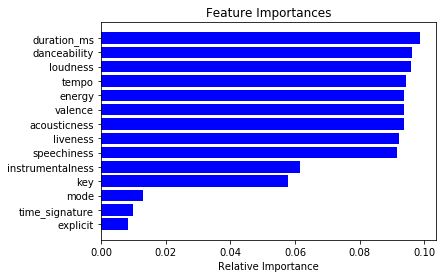

In [111]:
features = X_train.columns
#features = iris['feature_names']

importances = randomForestModel.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [112]:
lista = []
for i in indices:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf

Feature Importance
0         duration_ms
1        danceability
2            loudness
3               tempo
4              energy
5             valence
6        acousticness
7            liveness
8         speechiness
9    instrumentalness
10                key
11               mode
12     time_signature
13           explicit

[Go to Table of Contents](#init)

## XGBoost
<a id= "xgboost"></a>

XGBoost stands for “Extreme Gradient Boosting”.

XGBoost is used for __supervised learning problems__, where we use the training data (with multiple features) x's to predict a target variable y.

- Boost: not all data have the same probability of being selected. The __cases in which it is wrong__ assigns them a __greater probability of being selected in the following sample__ to try to correct the error. This presents an overfit problem. The samples are dependent (sequential). When composing uses a weighted average.

In [117]:
# fit model no training data
model = XGBClassifier(objective = 'multi:softmax')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [118]:
# make predictions for test data
y_predTest = model.predict(X_test)
predictionsTest = [round(value) for value in y_predTest]

# make predictions for test data
y_predTrain = model.predict(X_train)
predictionsTrain = [round(value) for value in y_predTrain]

### Train's Scores

In [119]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsTrain)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_train, predictionsTrain)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0 121.0 5050.0 1868.0  50.0   0.0   0.0   0.0 
        1  30.0 10526.0 4219.0 130.0   0.0   0.0   0.0 
        2   8.0 6983.0 6803.0 246.0   1.0   0.0   0.0 
        3   1.0 2647.0 4206.0 467.0   0.0   0.0   0.0 
        4   0.0 447.0 1326.0   8.0   1.0   0.0   0.0 
        5   0.0  48.0 251.0   0.0   0.0   0.0   0.0 
        6   0.0   2.0  23.0   0.0   0.0   0.0   1.0 


              precision    recall  f1-score   support

           0       0.76      0.02      0.03      7089
           1       0.41      0.71      0.52     14905
           2       0.36      0.48      0.42     14041
           3       0.52      0.06      0.11      7321
           4       0.50      0.00      0.00      1782
           5       0.00      0.00      0.00       299
           6       1.00      0.04      0.07        26

    accuracy                           0.39     45463
   macro avg       0.51      0.19      0.17     45463
wei

### Test's Scores

In [120]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsTest)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(y_test, predictionsTest)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0  21.0 1356.0 372.0  13.0   0.0   0.0   0.0 
        1  13.0 2787.0 920.0  22.0   0.0   0.0   0.0 
        2   1.0 1977.0 1419.0  32.0   0.0   0.0   0.0 
        3   2.0 784.0 881.0  81.0   1.0   0.0   0.0 
        4   0.0 150.0 292.0   2.0   0.0   0.0   0.0 
        5   0.0  13.0  43.0   0.0   0.0   0.0   0.0 
        6   0.0   3.0   4.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.57      0.01      0.02      1762
           1       0.39      0.74      0.52      3742
           2       0.36      0.41      0.39      3429
           3       0.54      0.05      0.09      1749
           4       0.00      0.00      0.00       444
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00         7

    accuracy                           0.39     11189
   macro avg       0.27      0.17      0.14     11189
weighted 

[Go to Table of Contents](#init)

### Feature Importance
<a id= "featureimportancexgboost"></a>

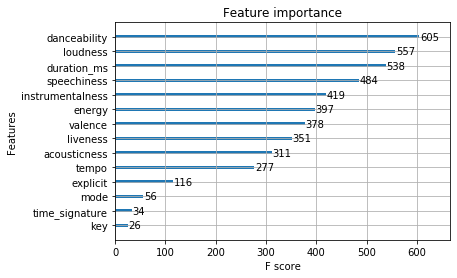

In [121]:
xgb.plot_importance(model);

In [122]:
lista = []
for i in indices:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf

Feature Importance
0         duration_ms
1        danceability
2            loudness
3               tempo
4              energy
5             valence
6        acousticness
7            liveness
8         speechiness
9    instrumentalness
10                key
11               mode
12     time_signature
13           explicit

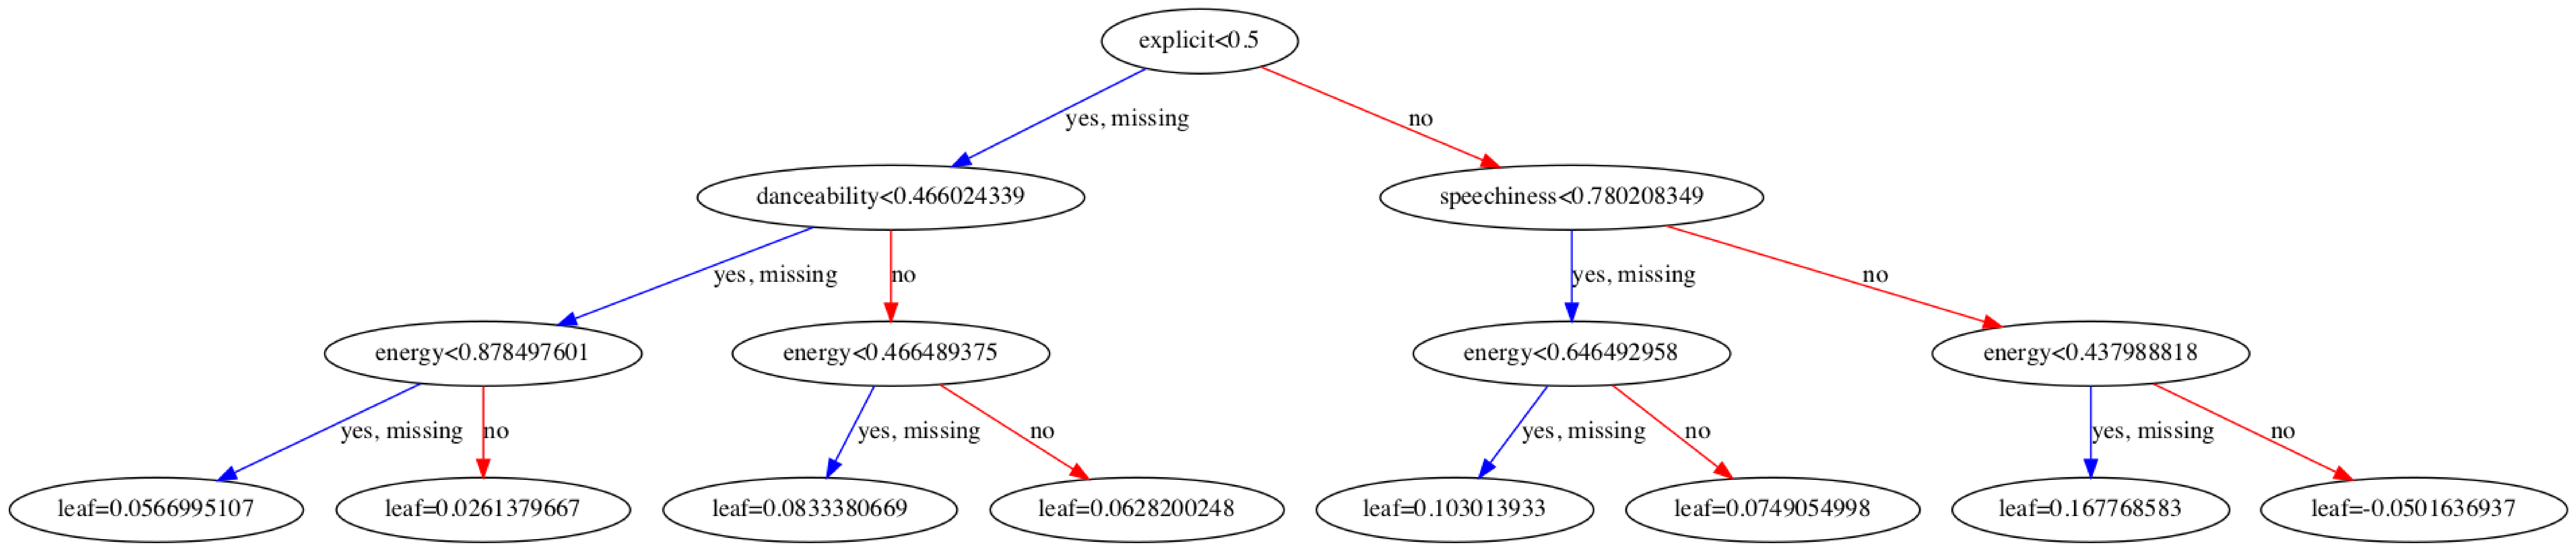

In [123]:
xgb.plot_tree(model, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('../images/tree2.png')
#xgb.to_graphviz(model, num_trees=2)

[Go to Table of Contents](#init)

## CatBoost
<a id= "catboost"></a>

is a high-performance open source library for gradient boosting on decision trees. CatBoost has the flexibility of giving indices of categorical columns so that it can be encoded as one-hot encoding

CatBoost is used for __supervised learning problems__, where we use the training data (with multiple features) x's to predict a target variable y with multiple classes.

Two critical algorithmic advances introduced in CatBoost are the implementation of ordered boosting, a permutation-driven alternative to the classic algorithm, and an innovative algorithm for processing categorical features. Both techniques were created to fight a prediction shift caused by a special kind of target leakage present in all currently existing implementations of gradient boosting algorithms.

In [124]:
train_data = X_train
eval_data = X_test 
# cat_features = [0]

train_label =  y_train
eval_label =  y_test
# train_dataset = Pool(data=train_data,
#                      label=train_label,
#                      cat_features=cat_features)
train_dataset = Pool(data=train_data,
                     label=train_label)
eval_dataset = Pool(data=eval_data,
                    label=eval_label)
# eval_dataset = Pool(data=eval_data,
#                     label=eval_label,
#                     cat_features=cat_features)


In [125]:

# Initialize CatBoostClassifier
model = CatBoostClassifier(loss_function='MultiClass')
# Fit model
model.fit(train_dataset)
# Get predicted classes
preds_class = model.predict(eval_dataset)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(eval_dataset)
# Get predicted RawFormulaVal
preds_raw = model.predict(eval_dataset, 
                          prediction_type='RawFormulaVal')

0:	learn: 1.9208292	total: 90.4ms	remaining: 1m 30s
1:	learn: 1.8984682	total: 103ms	remaining: 51.5s
2:	learn: 1.8767174	total: 123ms	remaining: 41s
3:	learn: 1.8566552	total: 143ms	remaining: 35.6s
4:	learn: 1.8372386	total: 164ms	remaining: 32.7s
5:	learn: 1.8188501	total: 183ms	remaining: 30.3s
6:	learn: 1.8018556	total: 200ms	remaining: 28.3s
7:	learn: 1.7854918	total: 216ms	remaining: 26.7s
8:	learn: 1.7699483	total: 231ms	remaining: 25.5s
9:	learn: 1.7549280	total: 250ms	remaining: 24.8s
10:	learn: 1.7411207	total: 266ms	remaining: 24s
11:	learn: 1.7276248	total: 283ms	remaining: 23.3s
12:	learn: 1.7154110	total: 306ms	remaining: 23.3s
13:	learn: 1.7034315	total: 325ms	remaining: 22.9s
14:	learn: 1.6923798	total: 341ms	remaining: 22.4s
15:	learn: 1.6815052	total: 358ms	remaining: 22s
16:	learn: 1.6713166	total: 374ms	remaining: 21.6s
17:	learn: 1.6613838	total: 389ms	remaining: 21.2s
18:	learn: 1.6518112	total: 405ms	remaining: 20.9s
19:	learn: 1.6426677	total: 422ms	remaining: 

166:	learn: 1.3889161	total: 3.32s	remaining: 16.5s
167:	learn: 1.3887118	total: 3.34s	remaining: 16.6s
168:	learn: 1.3884556	total: 3.37s	remaining: 16.6s
169:	learn: 1.3882112	total: 3.4s	remaining: 16.6s
170:	learn: 1.3879116	total: 3.42s	remaining: 16.6s
171:	learn: 1.3877276	total: 3.45s	remaining: 16.6s
172:	learn: 1.3874897	total: 3.47s	remaining: 16.6s
173:	learn: 1.3871756	total: 3.5s	remaining: 16.6s
174:	learn: 1.3868472	total: 3.52s	remaining: 16.6s
175:	learn: 1.3866569	total: 3.55s	remaining: 16.6s
176:	learn: 1.3865032	total: 3.57s	remaining: 16.6s
177:	learn: 1.3863062	total: 3.6s	remaining: 16.6s
178:	learn: 1.3860339	total: 3.62s	remaining: 16.6s
179:	learn: 1.3858234	total: 3.64s	remaining: 16.6s
180:	learn: 1.3856003	total: 3.66s	remaining: 16.5s
181:	learn: 1.3853797	total: 3.68s	remaining: 16.5s
182:	learn: 1.3851902	total: 3.69s	remaining: 16.5s
183:	learn: 1.3849925	total: 3.71s	remaining: 16.4s
184:	learn: 1.3848220	total: 3.73s	remaining: 16.4s
185:	learn: 1.3

327:	learn: 1.3609617	total: 7.44s	remaining: 15.3s
328:	learn: 1.3608381	total: 7.47s	remaining: 15.2s
329:	learn: 1.3607123	total: 7.5s	remaining: 15.2s
330:	learn: 1.3605365	total: 7.53s	remaining: 15.2s
331:	learn: 1.3603769	total: 7.55s	remaining: 15.2s
332:	learn: 1.3602556	total: 7.57s	remaining: 15.2s
333:	learn: 1.3601251	total: 7.6s	remaining: 15.2s
334:	learn: 1.3600090	total: 7.63s	remaining: 15.2s
335:	learn: 1.3599111	total: 7.66s	remaining: 15.1s
336:	learn: 1.3597838	total: 7.7s	remaining: 15.1s
337:	learn: 1.3596310	total: 7.74s	remaining: 15.2s
338:	learn: 1.3595402	total: 7.78s	remaining: 15.2s
339:	learn: 1.3594145	total: 7.82s	remaining: 15.2s
340:	learn: 1.3592729	total: 7.86s	remaining: 15.2s
341:	learn: 1.3591816	total: 7.91s	remaining: 15.2s
342:	learn: 1.3590707	total: 7.95s	remaining: 15.2s
343:	learn: 1.3589794	total: 7.99s	remaining: 15.2s
344:	learn: 1.3588621	total: 8.03s	remaining: 15.2s
345:	learn: 1.3586851	total: 8.05s	remaining: 15.2s
346:	learn: 1.3

492:	learn: 1.3410249	total: 11.5s	remaining: 11.8s
493:	learn: 1.3408932	total: 11.5s	remaining: 11.8s
494:	learn: 1.3407757	total: 11.5s	remaining: 11.8s
495:	learn: 1.3406232	total: 11.5s	remaining: 11.7s
496:	learn: 1.3404923	total: 11.6s	remaining: 11.7s
497:	learn: 1.3403558	total: 11.6s	remaining: 11.7s
498:	learn: 1.3402229	total: 11.6s	remaining: 11.6s
499:	learn: 1.3400893	total: 11.6s	remaining: 11.6s
500:	learn: 1.3400053	total: 11.6s	remaining: 11.6s
501:	learn: 1.3398950	total: 11.6s	remaining: 11.6s
502:	learn: 1.3397758	total: 11.7s	remaining: 11.5s
503:	learn: 1.3396897	total: 11.7s	remaining: 11.5s
504:	learn: 1.3395894	total: 11.7s	remaining: 11.5s
505:	learn: 1.3394519	total: 11.7s	remaining: 11.4s
506:	learn: 1.3393493	total: 11.7s	remaining: 11.4s
507:	learn: 1.3392664	total: 11.8s	remaining: 11.4s
508:	learn: 1.3391417	total: 11.8s	remaining: 11.4s
509:	learn: 1.3389926	total: 11.8s	remaining: 11.3s
510:	learn: 1.3389288	total: 11.8s	remaining: 11.3s
511:	learn: 

652:	learn: 1.3236781	total: 14.6s	remaining: 7.77s
653:	learn: 1.3236018	total: 14.6s	remaining: 7.75s
654:	learn: 1.3234635	total: 14.7s	remaining: 7.72s
655:	learn: 1.3233559	total: 14.7s	remaining: 7.7s
656:	learn: 1.3232205	total: 14.7s	remaining: 7.67s
657:	learn: 1.3231514	total: 14.7s	remaining: 7.65s
658:	learn: 1.3230204	total: 14.7s	remaining: 7.62s
659:	learn: 1.3229448	total: 14.7s	remaining: 7.6s
660:	learn: 1.3228404	total: 14.8s	remaining: 7.57s
661:	learn: 1.3227537	total: 14.8s	remaining: 7.55s
662:	learn: 1.3226197	total: 14.8s	remaining: 7.52s
663:	learn: 1.3225191	total: 14.8s	remaining: 7.5s
664:	learn: 1.3223701	total: 14.8s	remaining: 7.47s
665:	learn: 1.3222480	total: 14.9s	remaining: 7.45s
666:	learn: 1.3222047	total: 14.9s	remaining: 7.43s
667:	learn: 1.3221186	total: 14.9s	remaining: 7.4s
668:	learn: 1.3219904	total: 14.9s	remaining: 7.38s
669:	learn: 1.3219132	total: 14.9s	remaining: 7.35s
670:	learn: 1.3218179	total: 14.9s	remaining: 7.33s
671:	learn: 1.32

818:	learn: 1.3075079	total: 18.1s	remaining: 4s
819:	learn: 1.3074418	total: 18.1s	remaining: 3.98s
820:	learn: 1.3073058	total: 18.2s	remaining: 3.96s
821:	learn: 1.3072030	total: 18.2s	remaining: 3.94s
822:	learn: 1.3071233	total: 18.2s	remaining: 3.92s
823:	learn: 1.3070487	total: 18.2s	remaining: 3.9s
824:	learn: 1.3069860	total: 18.3s	remaining: 3.88s
825:	learn: 1.3068846	total: 18.3s	remaining: 3.85s
826:	learn: 1.3068041	total: 18.3s	remaining: 3.83s
827:	learn: 1.3067129	total: 18.4s	remaining: 3.81s
828:	learn: 1.3065954	total: 18.4s	remaining: 3.79s
829:	learn: 1.3064708	total: 18.4s	remaining: 3.77s
830:	learn: 1.3063830	total: 18.4s	remaining: 3.75s
831:	learn: 1.3062560	total: 18.4s	remaining: 3.72s
832:	learn: 1.3061329	total: 18.5s	remaining: 3.7s
833:	learn: 1.3060482	total: 18.5s	remaining: 3.68s
834:	learn: 1.3059668	total: 18.5s	remaining: 3.65s
835:	learn: 1.3058818	total: 18.5s	remaining: 3.63s
836:	learn: 1.3057574	total: 18.5s	remaining: 3.61s
837:	learn: 1.305

988:	learn: 1.2918897	total: 21.7s	remaining: 242ms
989:	learn: 1.2918441	total: 21.8s	remaining: 220ms
990:	learn: 1.2917541	total: 21.8s	remaining: 198ms
991:	learn: 1.2916553	total: 21.8s	remaining: 176ms
992:	learn: 1.2915170	total: 21.8s	remaining: 154ms
993:	learn: 1.2914215	total: 21.8s	remaining: 132ms
994:	learn: 1.2913807	total: 21.8s	remaining: 110ms
995:	learn: 1.2913116	total: 21.8s	remaining: 87.7ms
996:	learn: 1.2912078	total: 21.9s	remaining: 65.8ms
997:	learn: 1.2911739	total: 21.9s	remaining: 43.9ms
998:	learn: 1.2910978	total: 21.9s	remaining: 21.9ms
999:	learn: 1.2910010	total: 21.9s	remaining: 0us


### Train's Scores

In [126]:
print("Confusion matrix:\n")
cm =confusion_matrix(train_label, model.predict(train_dataset))
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(train_label, model.predict(train_dataset)))

Confusion matrix:

              0     1     2     3     4     5     6 
        0 412.0 4868.0 1719.0  89.0   1.0   0.0   0.0 
        1  70.0 10932.0 3707.0 196.0   0.0   0.0   0.0 
        2  27.0 5977.0 7698.0 335.0   4.0   0.0   0.0 
        3   9.0 2384.0 3826.0 1099.0   3.0   0.0   0.0 
        4   1.0 419.0 1194.0 139.0  29.0   0.0   0.0 
        5   0.0  45.0 205.0  41.0   7.0   1.0   0.0 
        6   0.0   1.0  23.0   2.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.79      0.06      0.11      7089
           1       0.44      0.73      0.55     14905
           2       0.42      0.55      0.47     14041
           3       0.58      0.15      0.24      7321
           4       0.66      0.02      0.03      1782
           5       1.00      0.00      0.01       299
           6       0.00      0.00      0.00        26

    accuracy                           0.44     45463
   macro avg       0.56      0.22      0.20     45463
we

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Test's Scores

In [127]:
print("Confusion matrix:\n")
cm =confusion_matrix(eval_label, preds_class)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)


print("\n")
print(classification_report(eval_label, preds_class)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0  39.0 1239.0 460.0  22.0   2.0   0.0   0.0 
        1  23.0 2490.0 1166.0  62.0   1.0   0.0   0.0 
        2   8.0 1683.0 1595.0 139.0   4.0   0.0   0.0 
        3   4.0 620.0 949.0 171.0   5.0   0.0   0.0 
        4   0.0 108.0 300.0  35.0   1.0   0.0   0.0 
        5   0.0   5.0  46.0   5.0   0.0   0.0   0.0 
        6   0.0   1.0   4.0   2.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.53      0.02      0.04      1762
           1       0.41      0.67      0.50      3742
           2       0.35      0.47      0.40      3429
           3       0.39      0.10      0.16      1749
           4       0.08      0.00      0.00       444
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00         7

    accuracy                           0.38     11189
   macro avg       0.25      0.18      0.16     11189
weighted

[Go to Table of Contents](#init)

### Feature Importance
<a id= "featureimportancecatboost"></a>

In [128]:
model.get_feature_importance(prettified= True)

Feature Id  Importances
0       danceability    11.047897
1        duration_ms    11.005506
2        speechiness     9.240048
3           loudness     8.881768
4             energy     8.687099
5            valence     8.268764
6       acousticness     8.190099
7   instrumentalness     8.180610
8              tempo     7.736335
9           liveness     7.405509
10               key     4.735856
11          explicit     3.432434
12              mode     2.325851
13    time_signature     0.862224

[Go to Table of Contents](#init)

## NGBoost
<a id= "ngboost"></a>

NGBoost stands for “Natural Gradient Boosting”.

Gradient Boosting methods have generally been among the top performers in predictive accuracy over structured or tabular input data. NGBoost enables predictive uncertainty estimation with Gradient Boosting through probabilistic predictions (including real valued outputs). With the use of Natural Gradients, NGBoost overcomes technical challenges that make generic probabilistic prediction hard with gradient boosting.

In [129]:
from ngboost import NGBClassifier
from ngboost.distns import k_categorical
from ngboost.learners import default_tree_learner
from ngboost.scores import MLE

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


# X, Y = load_boston(True)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

ngb = NGBClassifier(Dist=k_categorical(len(labels)))
ngb.fit(X_train, y_train) # Y should have only 3 values: {0,1,2}

/Applications/anaconda3/lib/python3.7/site-packages/ngboost/distns/categorical.py:47: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=1.4766 val_loss=0.0000 scale=0.5000 norm=4.2247


/Applications/anaconda3/lib/python3.7/site-packages/ngboost/distns/categorical.py:47: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 100] loss=1.4322 val_loss=0.0000 scale=1.0000 norm=7.0090
[iter 200] loss=1.4129 val_loss=0.0000 scale=1.0000 norm=6.8939
[iter 300] loss=1.4044 val_loss=0.0000 scale=1.0000 norm=6.8734
[iter 400] loss=1.3995 val_loss=0.0000 scale=0.5000 norm=3.4414


NGBClassifier(Base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                                         max_features=None, max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         presort=False, random_state=None,
                                         splitter='best'),
              Dist=<class 'ngboost.distns.categorical.k_categorical.<locals>.Categorical'>,
              Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
              minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
              tol=0.0001, verbose=True, verbose_eval=100)

In [130]:
# make predictions for test data
y_predTest = ngb.predict(X_test)
predictionsTest = [round(value) for value in y_predTest]

# make predictions for test data
y_predTrain = ngb.predict(X_train)
predictionsTrain = [round(value) for value in y_predTrain]

### Train's Scores

In [131]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsTrain)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)

print("\n")
print(classification_report(y_train, predictionsTrain)) 

Confusion matrix:

              0     1     2     3     4     5     6 
        0  87.0 5182.0 1781.0  36.0   3.0   0.0   0.0 
        1  10.0 10680.0 4106.0 109.0   0.0   0.0   0.0 
        2   0.0 7753.0 6091.0 197.0   0.0   0.0   0.0 
        3   0.0 3209.0 3772.0 340.0   0.0   0.0   0.0 
        4   0.0 632.0 1138.0  12.0   0.0   0.0   0.0 
        5   0.0  88.0 209.0   2.0   0.0   0.0   0.0 
        6   0.0   4.0  21.0   0.0   0.0   0.0   1.0 


              precision    recall  f1-score   support

           0       0.90      0.01      0.02      7089
           1       0.39      0.72      0.50     14905
           2       0.36      0.43      0.39     14041
           3       0.49      0.05      0.08      7321
           4       0.00      0.00      0.00      1782
           5       0.00      0.00      0.00       299
           6       1.00      0.04      0.07        26

    accuracy                           0.38     45463
   macro avg       0.45      0.18      0.15     45463
wei

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Test's Scores

In [132]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsTest)
print_cm(cm, labelsMatrix, hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsTest))

Confusion matrix:

              0     1     2     3     4     5     6 
        0  17.0 1418.0 318.0   9.0   0.0   0.0   0.0 
        1   5.0 2961.0 758.0  18.0   0.0   0.0   0.0 
        2   0.0 2246.0 1156.0  27.0   0.0   0.0   0.0 
        3   0.0 980.0 712.0  57.0   0.0   0.0   0.0 
        4   0.0 225.0 219.0   0.0   0.0   0.0   0.0 
        5   0.0  18.0  37.0   1.0   0.0   0.0   0.0 
        6   0.0   1.0   6.0   0.0   0.0   0.0   0.0 


              precision    recall  f1-score   support

           0       0.77      0.01      0.02      1762
           1       0.38      0.79      0.51      3742
           2       0.36      0.34      0.35      3429
           3       0.51      0.03      0.06      1749
           4       0.00      0.00      0.00       444
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00         7

    accuracy                           0.37     11189
   macro avg       0.29      0.17      0.13     11189
weighted 

[Go to Table of Contents](#init)

### Feature Importance
<a id= "featureimportancengboost"></a>

In [133]:
lista = []
for i in indices:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf

Feature Importance
0         duration_ms
1        danceability
2            loudness
3               tempo
4              energy
5             valence
6        acousticness
7            liveness
8         speechiness
9    instrumentalness
10                key
11               mode
12     time_signature
13           explicit

[Go to Table of Contents](#init)

# Conclusions
<a id= "conclusions"></a>


Based on the proposed scores, the best model to predict the test set was the CatBoost Model; NGBoost had the best precision, but in accuracy, recall and f1-score, the best model is CatBoost. Because the classification is not dichotomous but multiclass, there is no graphical representation of the ROC curve due to dimensionality; In addition, it is not so easy to relate prediction metrics (for example, accuracy) to an established benchmark, the best benchmark for comparison is that it has 100% successes in some class and zero in the others (which on average equals a distribution uniform data by class) which in this case corresponds to 10% (due to the ten classes) [16.6% for 6 classes]

|                     | Accuracy | precision | recall | f1-score |
|---------------------|----------|-----------|--------|----------|
| Logistic Regression | 0.36     | 0.31      | 0.36   | 0.27     |
| SVM                 | 0.35     | 0.22      | 0.35   | 0.25     |
| SVM Polynomial      | 0.37     | 0.42      | 0.37   | 0.29     |
| SVM RBF             | 0.37     | 0.41      | 0.37   | 0.29     |
| SVM Sigmoid         | 0.26     | 0.27      | 0.26   | 0.26     |
| Random Forest       | 0.35     | 0.34      | 0.35   | 0.3      |
| XGBoost             | 0.37     | 0.41      | 0.37   | 0.29     |
| CatBoost            | __0.38__     | 0.4       | __0.38__   | __0.31__     |
| NGBoost             | 0.37     | __0.43__     | 0.37   | 0.28     |

Looking at the feature importance for the models, every model had different features as the main characteristics to decide the classification, but some interesting conclusions arose from this initial approach.

| Feature Importance | Logistic Regression | SVM              | Random Forest    | XGBoost          | CatBoost         | NGBoost          |
|--------------------|---------------------|------------------|------------------|------------------|------------------|------------------|
| 1                  | danceability        | loudness         | duration_ms      | duration_ms      | duration_ms      | duration_ms      |
| 2                  | instrumentalness    | valence          | loudness         | loudness         | danceability     | loudness         |
| 3                  | explicit            | time_signature   | danceability     | danceability     | loudness         | danceability     |
| 4                  | energy              | explicit         | valence          | valence          | energy           | valence          |
| 5                  | valence             | acousticness     | acousticness     | acousticness     | speechiness      | acousticness     |
| 6                  | mode                | duration_ms      | speechiness      | speechiness      | valence          | speechiness      |
| 7                  | liveness            | key              | tempo            | tempo            | liveness         | tempo            |
| 8                  | acousticness        | instrumentalness | energy           | energy           | acousticness     | energy           |
| 9                  | speechiness         | danceability     | liveness         | liveness         | instrumentalness | liveness         |
| 10                 | duration_ms         | mode             | instrumentalness | instrumentalness | tempo            | instrumentalness |
| 11                 | time_signature      | tempo            | key              | key              | key              | key              |
| 12                 | tempo               | speechiness      | mode             | mode             | explicit         | mode             |
| 13                 | loudness            | energy           | time_signature   | time_signature   | mode             | time_signature   |
| 14                 | key                 | liveness         | explicit         | explicit         | time_signature   | explicit         |


XGBOOST and Random Forest models selected a group of features as the most important; `duration_ms`, `loudness`, `danceability`, `valence`, `acousticness`, among other. Every feature for these models is related somehow to the rest of the features; happening in both models. On the other hand, the SVM Linear Kernel and the Logistic Regression (both linear) selected a group of features as the most important as well; `explicit` is the main feature diference between the two groups of models. The only variable shared by the groups is `danceability`. Apparently, there are two approaches for this classification problem: a linear approach and a non-linear; only by looking at the features each model selects.


Therefore, following what the best model says, if you want a song to reach the maximum level of popularity you must take into account the duration of the song; how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity; the energy it produces, how fast, loud and noisy it is; and level of decibels.


# References
<a id= "references"></a>

https://spotipy.readthedocs.io/en/2.7.0/

https://developer.spotify.com/documentation/web-api/

https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-tracks/

https://en.wikipedia.org/wiki/Precision_and_recall

https://stats.stackexchange.com/questions/367155/why-lasso-for-feature-selection

https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

https://towardsdatascience.com/kernel-function-6f1d2be6091

https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

https://help.bitbond.com/article/20-the-10-loan-status-variants-explained

https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster

https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/svm.html

https://xgboost.readthedocs.io/en/latest/

https://xgboost.readthedocs.io/en/latest/parameter.html

https://github.com/stanfordmlgroup/ngboost/tree/master/examples

https://catboost.ai/

https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db

https://stanfordmlgroup.github.io/projects/ngboost/
